# BUSINESS CASE: BASED ON THE GIVEN FEATURE OF DATASET WE NEED TO CREATE PREDICTIVE MODEL WHICH HELP BANK MARKETING TEAM TO KNOW WHICH CUSTOMER WILL BUY PRODUCT (BANK TERM DEPOSIT). 

## IMPORT BASIC LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## LOAD DATA

In [2]:
data=pd.read_csv("bank-additional-full.csv", sep=';')
pd.set_option("display.max_columns", None)
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

### RENAME FEATURES NAME

In [3]:
data.rename(columns= {'emp.var.rate':'emp_var_rate', 'cons.price.idx': 'cons_price_idx', 'cons.conf.idx':'cons_conf_idx',
                      'nr.employed':'nr_employed', 'y':'Target'}, inplace = True)
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed Target  
0           1.1          93.994          -36.4      4.857       5191.0     no  
1           1.1          93.994          -36.4      4.857       5191.0     no  
2           1.1          93.994          -36.4      4.857       5191.0     no  
3           1.1          93.994          -36.4      4.857       5191.0     no  
4           1.1          93.994          -36.4      4.857       5191.0     no

## DOMAIN ANALYSIS

### BANK CUSTOMERS DATA
**1. AGE:**
- This is the different age group of the Account Holder in the dataset.

**2. JOB:**
- This variable probably represents the occupation or job of the customers Knowing this helps us understand their occupation, which can be useful for tailoring marketing efforts.

**3. MARITAL:**
- This variable likely represents the marital status of the customers such as "single", "married" or "divorced."

**4. EDUCATION:**
- This could represent the educational level of the customers like "high school", "college" or "university."

**5. DEFAULT:**
- This might be a binary variable indicating whether the customers have defaulted on a financial obligation or not.

**6. HOUSING:**
- This could be a binary variable indicating whether the customers has a housing loan or not.

**7. LOAN:**
- This might be a binary variable indicating whether the customers have a loan or not.

### RELATED WITH THE LAST CONTACT OF THE CURRENT CAMPAIGNS

**8. CONTACT:**
- This variable probably represents the method of contact used to reach out to these customers which could include "cellular" "telephone" or "unknown".

**9. MONTH:**
- This likely represents the month when the last contact was made possibly useful for seasonal analysis.

**10. DAY_OF_WEEK:**
- Day of the week of the last contact made with the person. This provides information about the timing of the communication or marketing efforts.

**11. DURATION:**
- This might represent the duration of the last contact with the customers in seconds.

### OTHER ATTRIBUTES

**12. CAMPAIGNS:**
- It represents the number of marketing campaigns or contacts made with customers during the current effort.

**13. PDAYS:**
- This could represent the number of days since the customers was last contacted possibly related to a previous marketing campaign.

**14. PREVIOUS:**
- This variable might represent the number of contacts performed with the customers before this current campaign.

**15. POUTCOME:**
- It represents the outcome of previous marketing campaigns, whether they were "successful" "failure" or "nonexistent".

### SOCIAL AND ECONOMIC CONTEXT ATTRIBUTES

**16. EMP.VAR.RATE: (EMPLOYMENT VARIATION RATES)**
- Employment variation rate quarterly indicator. This is an economic indicator that reflects changes in the employment market.

**17. CONS.PRICE.IDX: (CUNSUMERS PRICE INDEX)**
- Consumer price index monthly indicator. This is a measure that examines the average change in prices paid by consumers for goods and services over time, indicating inflation or deflation trends.

**18. CONS.CONF.IDX: (CONSUMERS CONFIDENCE INDEX)**
- Consumer confidence index monthly indicator. This measures the degree of optimism on the state of the economy that consumers are expressing through their activities of savings and spending.

**19. EURIBOR3M: (EURIBOR 3-MONTH RATE)**
- Euribor 3-month rate daily indicator. This is the interest rate at which European banks lend funds to one another for a three-month period in the Eurozone.

**20. NR.EMPLOYED: (NUMBER OF EMPLOYEES)**
- Number of employees quarterly indicator. This represents the quarterly average number of employed people.

### OUTPUT FEATURE

**21. TARGET:**
- This is the target variable. It indicates whether a customers has subscribed to a term deposit. It's typically a binary choice, with "yes" or "no".

## BASIC CHECKS

In [4]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed Target  
0           1.1          93.994          -36.4      4.857       5191.0     no  
1           1.1          93.994          -36.4      4.857       5191.0     no  
2           1.1          93.994          -36.4      4.857       5191.0     no  
3           1.1          93.994          -36.4      4.857       5191.0     no  
4           1.1          93.994          -36.4      4.857       5191.0     no

In [5]:
data.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
41183  cellular   nov         fri       334         1    999         0   
41184  cellular   nov         fri       383         1    999         0   
41185  cellular   nov         fri       189         2    999         0   
41186  cellular   nov         fri       442         1    999         0   
41187  cellular   nov         fri       239         3    999         1   

          poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr_employed Target  
41183       4963.6    yes  
41184       4963.6     no  
41185       4963.6     no  
41186       4963.6    yes  
41187       4963.6     no

In [6]:
data.shape

(41188, 21)

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'Target'],
      dtype='object')

In [8]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
Target             object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

### NUMERICAL FEATURES

In [10]:
num_data = data.select_dtypes(include=["int64","float64"])
num_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

### CATEGORICAL FEATURES

In [11]:
cat_data = data.select_dtypes(include='O')
cat_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'Target'],
      dtype='object')

###  UNIQUE CATEGORICAL FEATURES

In [12]:
for i in cat_data:
    print(i,cat_data[i].unique())
    print(cat_data[i].value_counts())
    print("------------------------------------")

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
------------------------------------
marital ['married' 'single' 'divorced' 'unknown']
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
------------------------------------
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                

### STATISTICAL MEASURES OF NUMERICAL DATA

In [13]:
data.describe().T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp_var_rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons_price_idx  41188.0    93.575664    0.578840    92.201    93.075   
cons_conf_idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr_employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp_var_rate       1.100     1.400     1.400  
cons_price_idx    93.749    93.994    94.767  
cons_conf_idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr_employed     5191.000  5228.100  5228.100

### OBSERVATION/INSIGHTS

**1. AGE:**

- The average age of customers in the dataset is approximately 40 years, ranging from 17 to 98.
- Most customers fall between the ages of 32 and 47.

**2. DURATION:**

- The average call duration is around 258 seconds (approximately 4.3 minutes).

**3. CAMPAIGN:**

- On average, there were 2.57 contacts made during the campaign.
- The number of contacts ranges from 1 to 56.

**4. PREVIOUS:**

- The average number of contacts performed before this campaign is 0.17.

**5. EMPLOYMENT VARIATION RATE (emp.var.rate):**

- The employment variation rate averages around 0.082.

**6. CONSUMER PRICE INDEX (cons.price.idx):**

- The consumer price index averages around 93.58.

**7. CONSUMER CONFIDENCE INDEX (cons.conf.idx):**

- The consumer confidence index averages approximately -40.50.

**8. EURIBOR 3-MONTH RATE (euribor3m):**

- The Euribor 3-month rate averages around 3.62.

**9. NUMBER OF EMPLOYEES (nr.employed):**

- The number of employees in the dataset averages around 5167.

### STATISTICAL MEASURES OF CATEGORICAL DATA

In [14]:
data.describe(include='O')

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome Target  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

## EXPLORATORY DATA  ANALYSIS 

### 1.UNIVARIATE DATA ANALYSIS

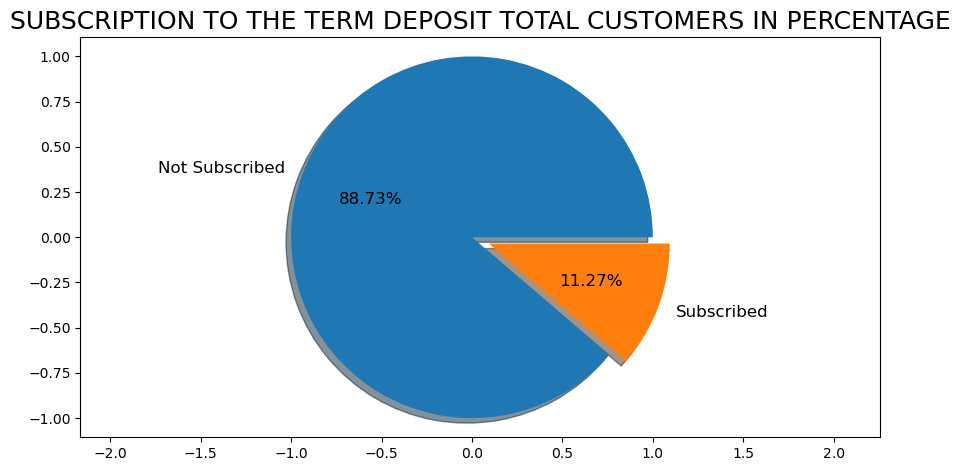

In [15]:
labels = ["Not Subscribed", "Subscribed"]
explode = (0, 0.1)  # Only "explode" the second slice (i.e., 'Subscribed')

# Depicting the visualization
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0, 0, 1, 1])

ax.pie(data['Target'].value_counts(),
       labels=labels,
       explode=explode,
       autopct='%1.2f%%',
       shadow=True,
       frame=True,
       textprops=dict(color="black", size=12))

ax.axis('equal')
plt.title('SUBSCRIPTION TO THE TERM DEPOSIT TOTAL CUSTOMERS IN PERCENTAGE',
          loc='center',  # Adjusted 'loc' to 'left' for proper alignment
          color='black',
          fontsize='18')

plt.show()

### OBSERVATION/INSIGHTS
#### TARGET (SUBSCRIBE OR NOT SUBSCRIBE):
- In this data the majority of 36,548(89%) of customers have not buying product(customers saying no to the product) and the 4,640(11%) of customers have purchase a product.

In [16]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### OBSERVATION/INSIGHTS

**1. AGE:**
- The customers various ages range from start from 20 and go up to above 80.
- The minimum age of customer is 17 years old, and the maximum age of customer is 98 years old. This shows a wide range of ages in the group.
- The average age of the customers is 40.
- The age data is not normally distributed.data is skewed.

**2. JOB:**
- In this job data the majority and common occupations with 10,422(25%) customers working in administrative roles and 9,254(22%) customers in blue-collar jobs.Technicians Around 16% means 6,743 customers are having technicians job. 
- Services: 10% customers having servoces job role. 
- Management: 7% customers having Management job role.
- Retired: 4% of customers are retired. .
- Entrepreneurs and Self-employed: 7% of customers are Entrepreneurs and Self-employed.
- Other Occupations: Housemaids, unemployed customers, and students each represent Minimum numbers of  customers 3% or less.

**3. MARITAL:**
- Out of the total customers represented in the data 24,928(61%) of customers are married while around 11,568(28%) of cutomers are not single. and 4,612(11%) of cutomers are divorced. and 80(1%) of customers are unknown.

**4.EDUCATION:**
- In this education data, the majority of customers 12,168(30%) share a common educational background, with the highest level of education being a university degree.
- Secondly 9,515(23%) of the customers have completed high school (12th grade) indicating basic secondary education. 
- 21% of Customers with a 9-year basic education (basic.9y) or a 6-year basic education (basic.6y) of the dataset combined.
- Around 13% of the customers have completed a professional course.
- 10% Customers with 4-year basic education (basic.4y) representing completion of elementary education.
- In this default data the majority of 32,588(79%) of customers have no credit default. and less than 1% of customers having credit default. and unknown credit default is 21% of customers.

**6. HOSUING:**
- In this housing data the majority of 21,576(52%) of customers have hosuing loan. and 18,622(45%) of customers having no housing loan. and unknown housing loan is 2% of customers.

**7. LOAN:**
- In this loan data the maximum 33,950(82%) of customers have no loan and 6,248(15%) of customers having loan. and unknown loan is 2% of customers.

**8. CONTACT:**
- In this Contact data the maximum number of 26,144(63%) of customers Communication type used to contact is cellular. and the minimum number of 15,044(37%) of customers Communication type used to contact is telephone.

**9. MONTH:**
- The month of May has the highest number of contact with 13,769(33%) of customers.
- July follows with 7,174(17%) contacts.
- August accounts for 6,178(15%) contacts.
- June accounts for 5,318(13%) contacts.
- contact activities,with higher contacts during this months (May, July, August, and June) and comparatively lower contacts during this months(November, October, September, and March).

**10. DAY_OF_WEEK:**
- Thursday (21%) and Monday (21%) stand out as the days with the highest contact percentages.
- Wednesday (20%) and Tuesday (20%) have slightly lower but still consistent contact rates.
- Friday (19%) shows a slightly lower contact rate compared to other weekdays.

**11. DURATION:**
- The maximum duration of last contact with the customers is 4,918 seconds. and the minimum duration  of last contact with the customers is 0 seconds.The average time taken for every phone call is 258 seconds.

**12. CAMPAIGN:**
- The campaign involved a maximum of 56 contacts while the minimum number of contacts is 1. On average each person was contacted 2.6 times during the campaign.

**13. PDAYS:**
- The maximum number of days is 999 and The minimum number of days since the last contact is 0 and the average customers were last contacted approximately 962 days ago.

**14. PREVIOUS:**
- A customers of (86%) had no previous contacts before the current campaign. (11%) of customers had been contacted between 1 and 35 times before this campaign.

**15. POUTCOME:**
- The majority of outcomes from the previous marketing campaign were categorized as "nonexistent" representing 86% of the cases.
- Around 10% of the outcomes were classified as "failure".
- A smaller 3%, represents outcomes categorized as "success".

**16. EMP_VAR_RATE (EMPLOYMENT VARIATION RATES):**
- The employment variation rates provided range from -3.41 to 1.416.
- The two highest positive rates, 1.416 and 1.17  account for approximately 39% of the provided data. 
- Negative rates such as -1.89, -0.13, -2.91, -3.41, and -1.777 account for 22% of the data.

**17. CONS_PRICE_IDX (CUNSUMERS PRICE INDEX):**
- The maximum monthly indicator of inflation and living rate of customers is 94.77 and minimum monly indicator of inflation and living rate of customers is 92.20 and the average monthly indicator of inflation and living rate of customers is 93.58.

**18. CONS_CONF_IDX (CONSUMERS CONFIDENCE INDEX):**
- The range of consumers confidence index is -50.8 to -26.9. and the average of consumers confidence index is -40.5.
- All the values are negative consumer confidence index often indicates a lack of confidence and positivity among people regarding economic matters.

**19. EURIBOR3M (EURIBOR 3-MONTH RATE):**
- The maximum number of Euribor interest rate is 5.04 and the minimum number of Euribor interest rate is 0.63. and the average interest rate is 3.62.

**20. NR.EMPLOYED: (NUMBER OF EMPLOYEES):**
- The maximum number of employees has remained stable at 5,228 over the quarters.
- The minimum number of employees 4964. and the average number of employees has 5167.

**21. TARGET:**
- In this data the majority of 36,548(89%) of customers have not buying product(customers saying no to the product) and the 4,640(11%) of customers have purchase a product.

### 2. BIVARIATE DATA ANALYSIS

#### RELATIONSHIP OF INDEPENDANT FEATURE WITH RESPECT TO TARGET FEATURE
#### NUMERICAL FEATURE

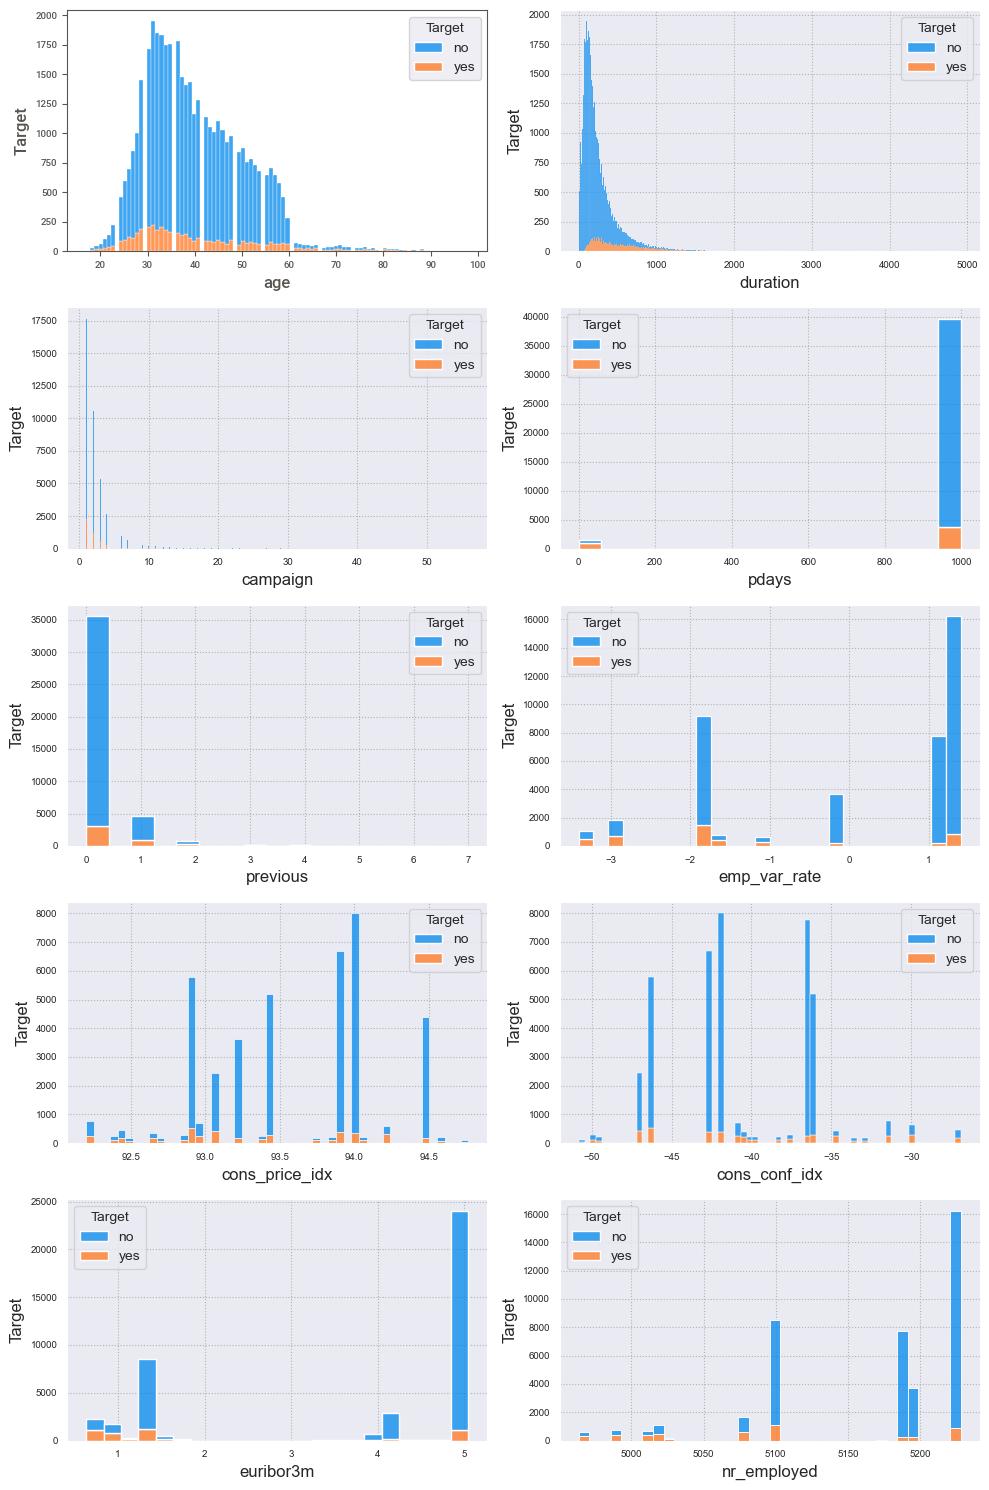

In [17]:
plt.figure(figsize=(10,15),facecolor="white")
plotnumber=1

for column in num_data:
    if plotnumber<=len(num_data):
        plt.subplot(5,2,plotnumber)
        sns.set_style("darkgrid", {"grid.color": ".7", "grid.linestyle": ":"})
        sns.histplot(x=column, hue="Target", data=data, multiple="stack")
        plt.xlabel(column,fontsize=12)
        plt.ylabel("Target",fontsize=12)
        plt.xticks(fontsize=7)
        plt.yticks(fontsize=7)
    plotnumber+=1
plt.tight_layout()

### OBSERVATION/INSIGHTS

#### 1. RELATIONSHIP BETWEEN AGE AND TARGET
- In this scenario, the majority of customers aged between 25 to 40 are showing moderate interest in purchasing the product.However, within the same age range, maximum customers are not showing a strong interest in purchasing the product.

#### 2. RELATIONSHIP BETWEEN DURATION AND TARGET
- A short duration of the last contact with a customer often results in a moderately high rate of "Yes" subscriptions to the term deposit.However, within the same duration, most customers do not show a strong interest, leading to a high rate of "No" subscriptions to the term deposit 

#### 3. RELATIONSHIP BETWEEN COMPAIGN AND TARGET
- When a minimum number of marketing campaigns or contacts are made with customers, the rate of "Yes" subscriptions to the term deposit is moderately high.However, when same marketing campaigns or contacts are made, most customers do not show a strong interest, resulting in a high rate of "No" subscriptions to the term deposit.

#### 4. RELATIONSHIP BETWEEN PDAYS AND TARGET
- The majority of number of days are 999 that time the customers were low rate of "Yes" subscriptions to the term deposit. on the other hand the same number of days that time customers were high rate of "No" subscriptions to the term deposit.
- When the number of days is at its minimum, there are few "Yes" subscriptions to the term deposit, and most customers do not subscribe to the term deposit.

#### 5. RELATIONSHIP BETWEEN PREVIOUS AND TARGET
- When the number of contacts with the customers before this current campaign is lower, there is a higher rate of "No" subscriptions to the term deposit.at the same number of contact there is a lower rate of "No" subscriptions to the term deposit.

#### 6. RELATIONSHIP BETWEEN EMPLOYMENT VARIATION RATES AND TARGET
- When the employment variation rate is high, there is a higher rate of "No" subscriptions to the term deposit and a lower rate of "Yes" subscriptions to the term deposit.
- When the employment variation rate is lower (negative values of emp_var_rate), there is a lower rate of "No" subscriptions to the term deposit and a slightly increased rate of "Yes" subscriptions to the term deposit.

#### 7. RELATIONSHIP BETWEEN CUNSUMERS PRICE INDEX AND TARGET
- When the Consumer Price Index (CPI) ranges from 93.99 to 92.893 and from 93.99 to 94.0, and then to 94.5, there is a higher rate of "No" subscriptions to the term deposit and a lower rate of "Yes" subscriptions to the term deposit.

#### 8. RELATIONSHIP BETWEEN CONSUMERS CONFIDENCE INDEX AND TARGET
- When the Consumer Confidence Index is -37, -41, -42, -46, and -47, there is a higher rate of "No" subscriptions to the term deposit and a lower rate of "Yes" subscriptions to the term deposit.

#### 9. RELATIONSHIP BETWEEN EURIBOR3M AND TARGET
- When the Euribor3M rates are maximum, there is a higher rate of "No" subscriptions to the term deposit.at the same time on the other hand Euribor3M rates are maximum there is a lower rate of "Yes" subscriptions to the term deposit.
- while lower Euribor3M rates are associated with a lower of "No" subscriptions.

#### 10. RELATIONSHIP BETWEEN NUMBER OF EMPLOYEES AND TARGET
- When the number of employees is at its maximum, there is a higher rate of "No" subscriptions to the term deposit. Simultaneously, when the number of employees is at its maximum, there is a lower rate of "Yes" subscriptions to the term deposit.
- Conversely, when the number of employees is at its minimum, there is a lower rate of "No" subscriptions to the term deposit.

#### CATEGORICAL FEATURES

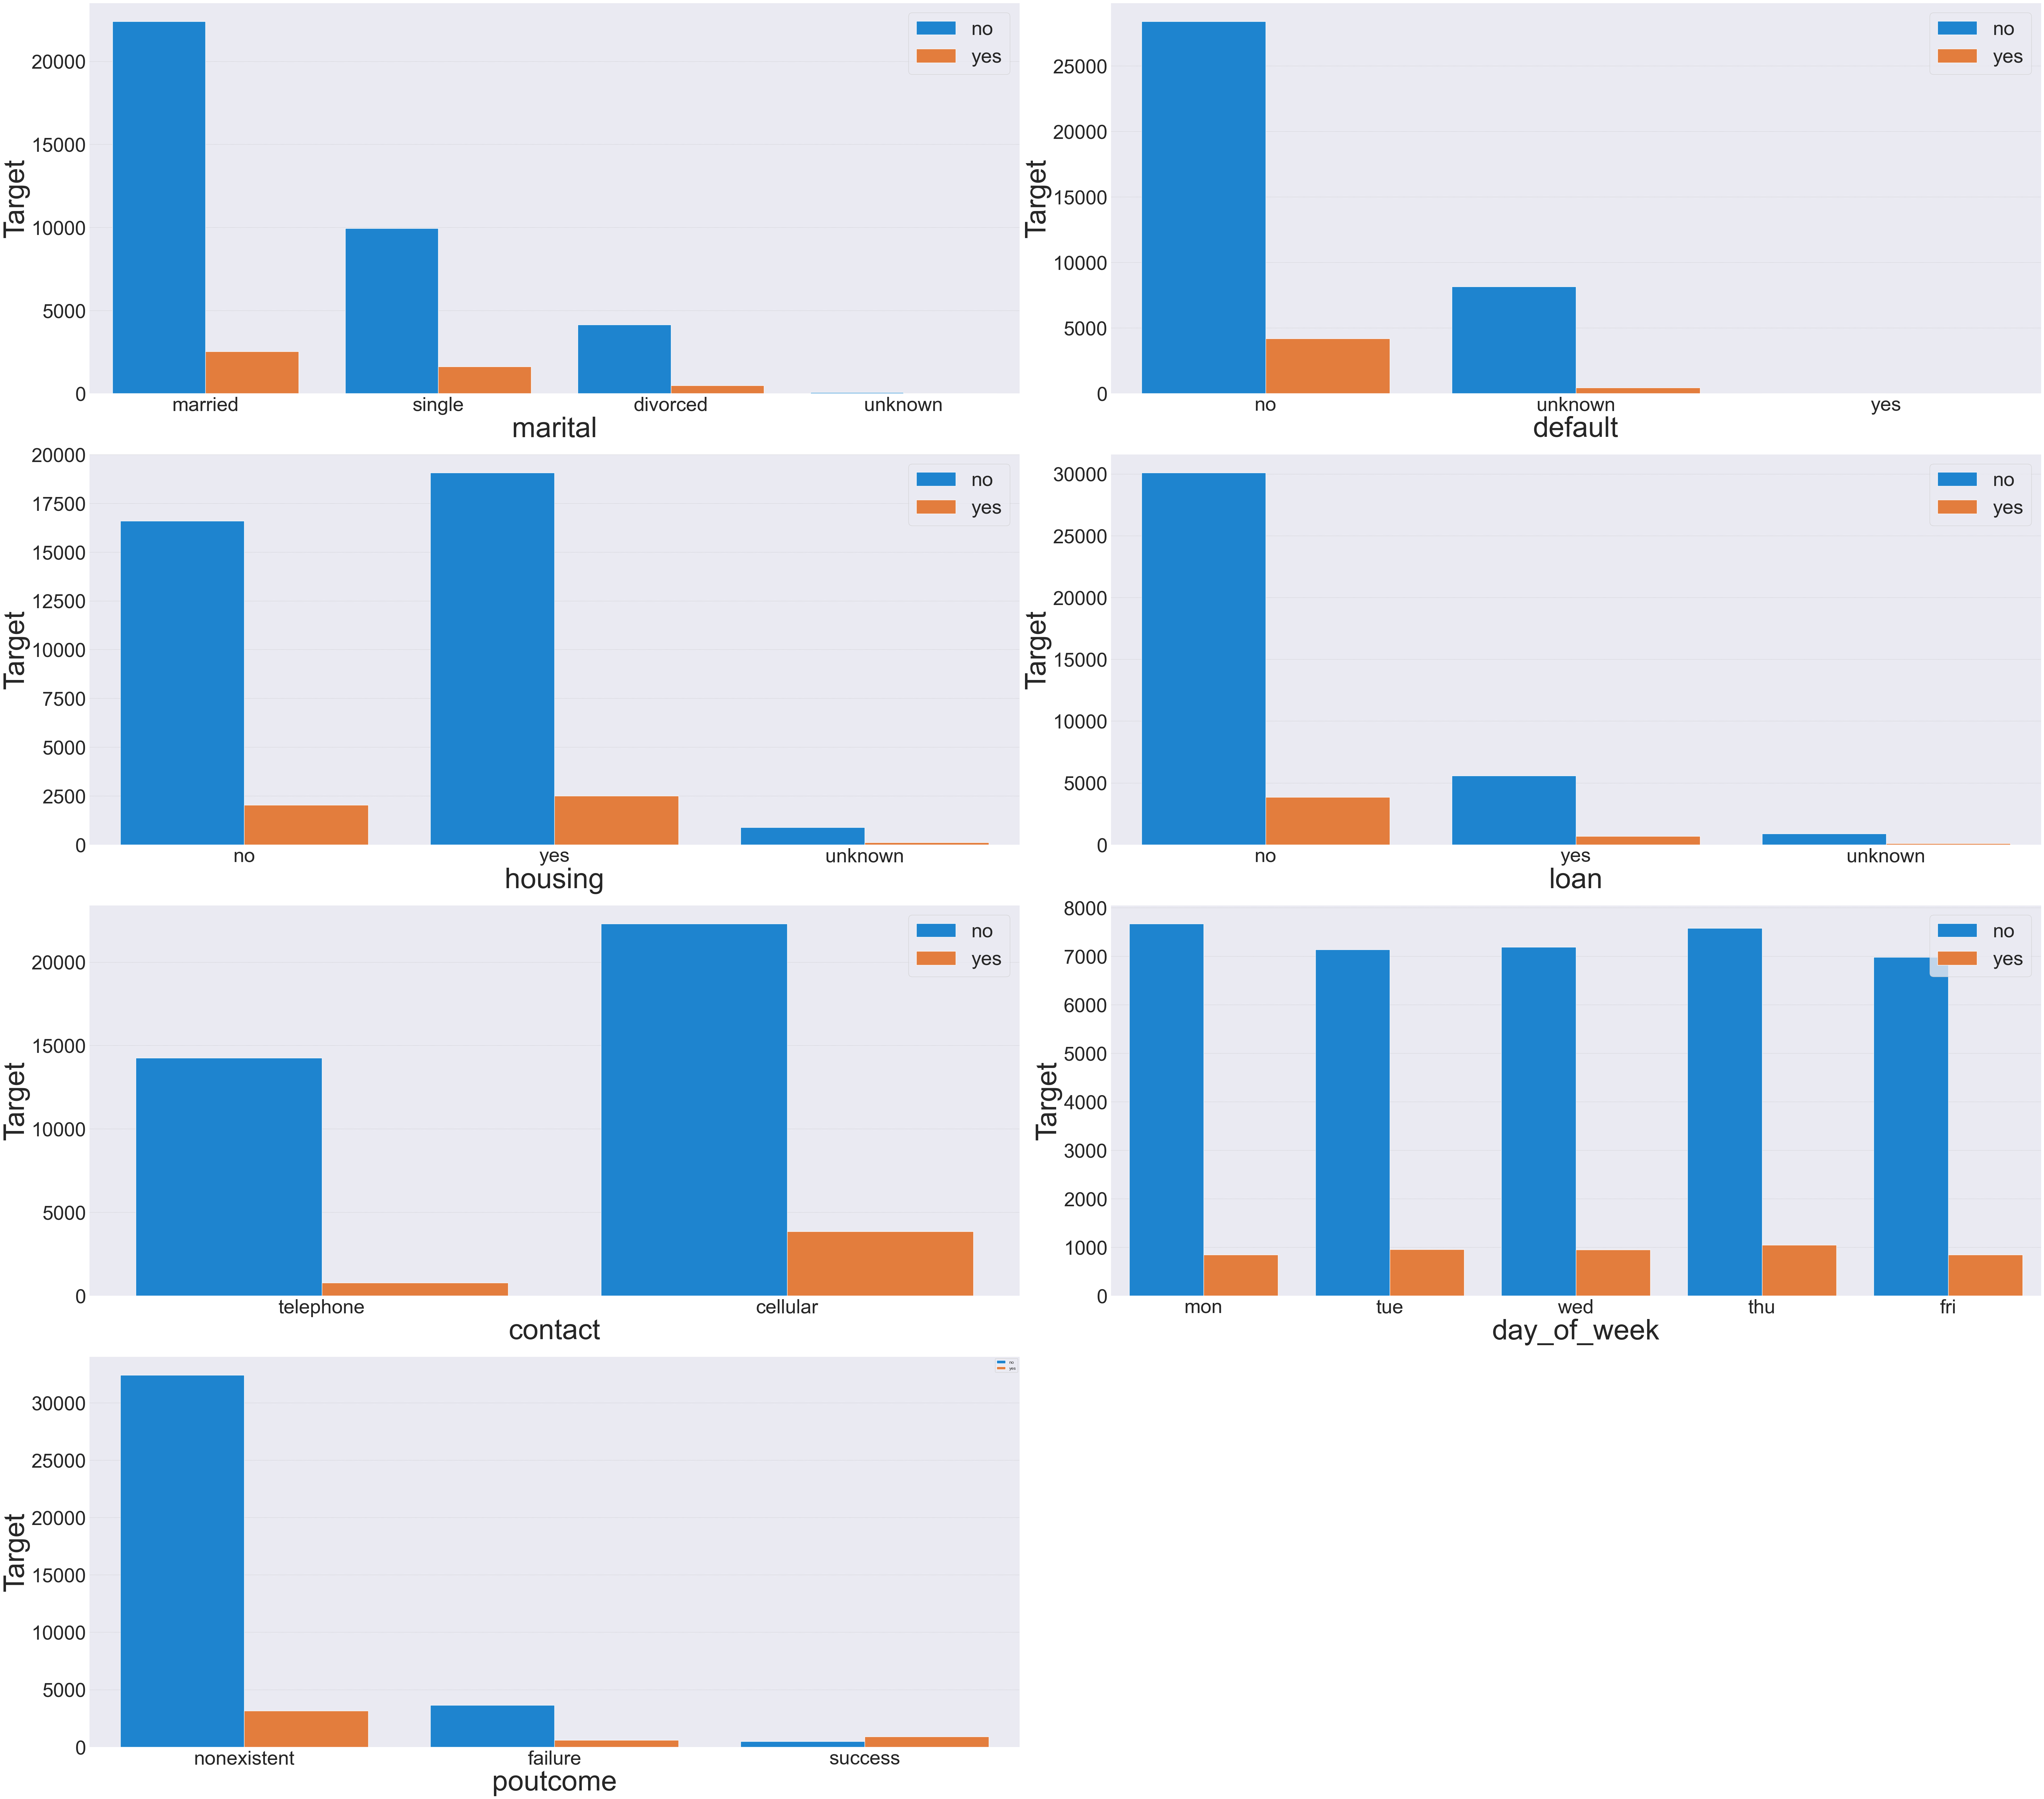

In [18]:
plt.figure(figsize=(65,70),facecolor="white")
plotnumber=1

for column in cat_data.drop(["Target","job","education","month"],axis=1):
    if plotnumber<=10:
        plt.subplot(5,2,plotnumber)
        sns.countplot(data=data,x=cat_data[column],hue=data["Target"])
        plt.xlabel(column,fontsize=65)
        plt.ylabel("Target",fontsize=65)
        plt.xticks(fontsize=45)
        plt.yticks(fontsize=45)
        plt.legend(fontsize="45", loc ="upper right")
    plotnumber+=1
plt.tight_layout()
plt.legend()
plt.show() 

### OBSERVATION/INSIGHTS

#### 1. RELATIONSHIP BETWEEN MARITAL_STATUS AND TARGET
- Customers which are married tend to have moerately high rate of "Yes" subscriptions to the term deposit compared to customers which are single divorse. However these customers also exhibits a higher rate rate of "No" subscriptions to the term deposit.

#### 2. RELATIONSHIP BETWEEN DEFAULT AND TARGET
- Customers with no defaults tend to have a moderately high rate of "Yes" subscriptions to the term deposit compared to customers with unknown default status and those who have defaulted. However, customers with no defaults also have a higher rate of "No" subscriptions to the term deposit 

#### 3. RELATIONSHIP BETWEEN HOUSING AND TARGET
- Customers with a housing loan tend to have a moderately high rate of "Yes" subscriptions to the term deposit as comapared to Unknown and NO housing status.
- However, these customers also exhibit a higher rate of "No" subscriptions to the term deposit.

#### 4. RELATIONSHIP BETWEEN LOAN AND TARGET
- Customers without a loan generally show a good likelihood of saying "Yes" to subscribing to the term deposit, as compared to customers having loan, However these customers also display a higher rate of "No" subscriptions to the term deposit.

#### 5. RELATIONSHIP BETWEEN CONTACT AND TARGET
- Customers contacted through cellphones exhibit a high rate of "Yes" subscriptions to the term deposit compared to those contacted through telephones.However, these customers also show a higher rate of "No" subscriptions to the term deposit.

#### 6. RELATIONSHIP BETWEEN DAY_OF_WEEK AND TARGET
- On weekdays (Monday to Friday), customers consistently show a high rate of "Yes" subscriptions to the term deposit.However, these customers also exhibit a higher rate of "No" subscriptions to the term deposit.

#### 7. RELATIONSHIP BETWEEN POUTCOME AND TARGET
- Most of the customers contacted have previous outcome as 'nonexistent' there tends to be higher rate of "yes" subscriptions to the term deposit as comapred to 'failure' and 'success'. However, these customers also exhibit a higher rate of "No" subscriptions to the term deposit.

#### RELATIONSHIP BETWEEN MONTH  WITH RESPECT TO TARGET

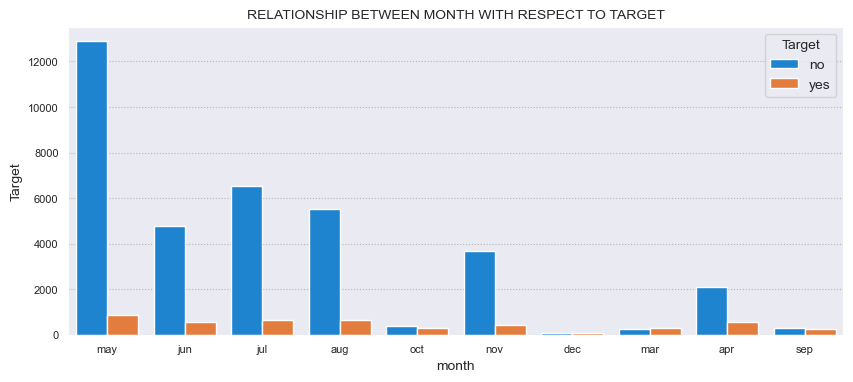

In [19]:
plt.figure(figsize = (10,4),facecolor = "white")
sns.countplot(data=data,x=data["month"],hue=data["Target"])
plt.xlabel("month",fontsize=10)
plt.ylabel("Target",fontsize=10)
plt.title('RELATIONSHIP BETWEEN MONTH WITH RESPECT TO TARGET',fontsize =10)
plt.show()

### OBSERVATION/INSIGHTS

####  RELATIONSHIP BETWEEN MONTH AND TARGET
- During the months of May, June, July, April, and August there tends to be a higher rate of "Yes" subscriptions to the term deposit However, these month also exhibit a higher rate of "No" subscriptions to the term deposit.

#### RELATIONSHIP BETWEEN EDUCATION WITH RESPECT TO TARGET

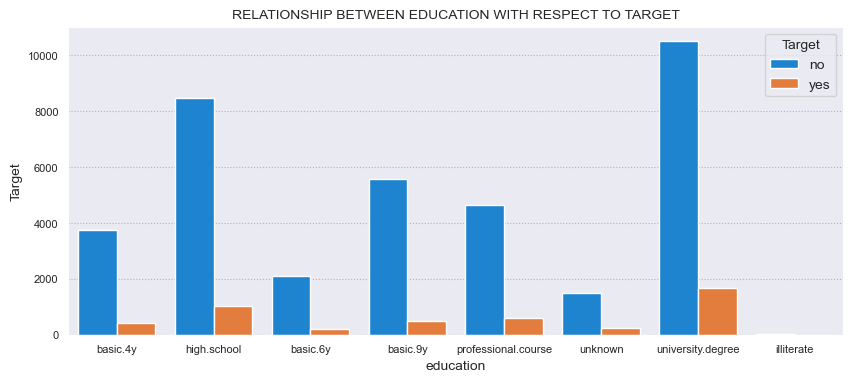

In [20]:
plt.figure(figsize = (10,4),facecolor = "white")
sns.countplot(data=data,x=data["education"],hue=data["Target"])
plt.xlabel("education",fontsize=10)
plt.ylabel("Target",fontsize=10)
plt.title('RELATIONSHIP BETWEEN EDUCATION WITH RESPECT TO TARGET',fontsize =10)
plt.show()

### OBSERVATION/INSIGHTS

####  RELATIONSHIP BETWEEN EDUCATION AND TARGET
- Customers with university degrees and high school education backgrounds show a higher likelihood of subscribing to term deposits.However, these customers also showing interest, often decide not to subscribe to term deposits.
- Customers with professional courses, a 9-year basic education (Basic.9y), and a 4-year basic education (Basic.4y) also demonstrate a slightly higher inclination to subscribe to term deposits compared to customers with other education levels.


#### RELATIONSHIP BETWEEN JOB WITH RESPECT TO TARGET

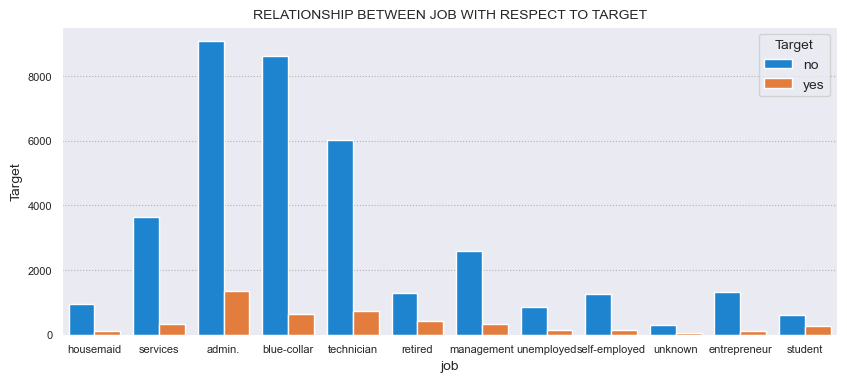

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(data=data,x=data["job"],hue=data["Target"])
plt.xlabel("job",fontsize=10)
plt.ylabel("Target",fontsize=10)
plt.title('RELATIONSHIP BETWEEN JOB WITH RESPECT TO TARGET',fontsize =10)
plt.show()

### OBSERVATION/INSIGHTS

####  RELATIONSHIP BETWEEN JOB AND TARGET
- Customers in higher-level job positions like admin, blue-collar, and technicians typically show interest by subscribing to term deposits at a higher rate.However, despite their interest, many of these customers ultimately decide not to subscribe to term deposits.


### 3. MULTIVARIATE DATA ANALYSIS

#### 1.	RELATION BETWEEN DURATION  & CAMPAIGN WITH RESPECT TO TARGET.

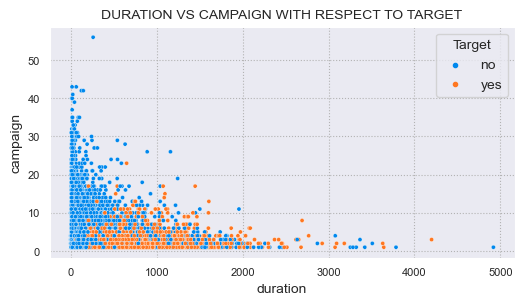

In [22]:
plt.figure(figsize=(6,3))
sns.scatterplot(x='duration', y='campaign',data = data,hue = 'Target')
plt.title('DURATION VS CAMPAIGN WITH RESPECT TO TARGET',fontsize =10)
plt.show()

### OBSERVATION/INSIGHTS
- From the plot, we notice that customers who said "yes" and customer who said "no" are in distinct groups. "Yes" customer were contacted fewer times and had longer conversations. Notably, after five calls, customer tend to reject the term deposit, unless the conversation is lengthy. Most customers who said "yes" were contacted fewer than 10 times.

#### 2. 	RELATION BETWEEN JOB AND AGE WITH RESPECT TO TARGET.

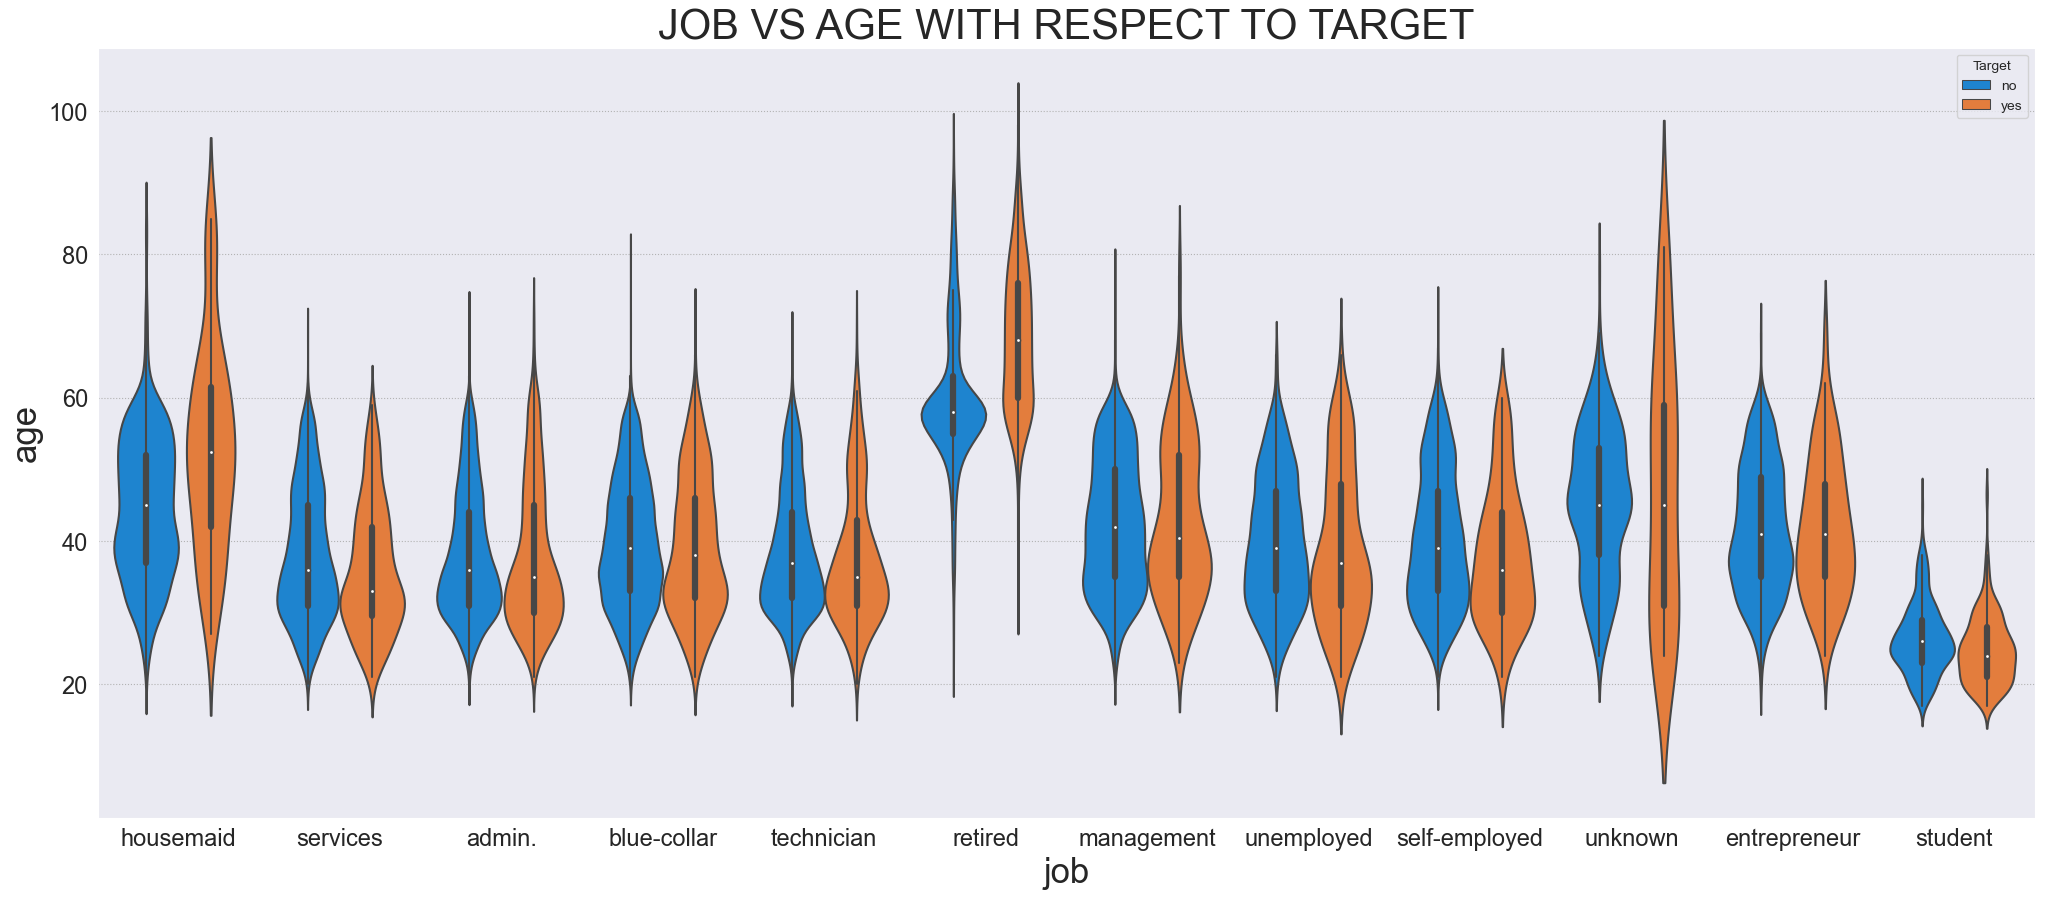

In [23]:
plt.figure(figsize=(25,10))
sns.violinplot(x='job', y='age', data=data, hue='Target')
plt.title('JOB VS AGE WITH RESPECT TO TARGET',fontsize =30)
plt.xlabel('job',fontsize =25)
plt.ylabel('age',fontsize =25)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.show()

### OBSERVATION/INSIGHTS
- Customers which are retired and over 60 years old are more likely higher rate of "Yes" subscriptions to the term deposit.

#### 3. RELATION BETWEEN MARITAL AND AGE WITH RESPECT TO TARGET.

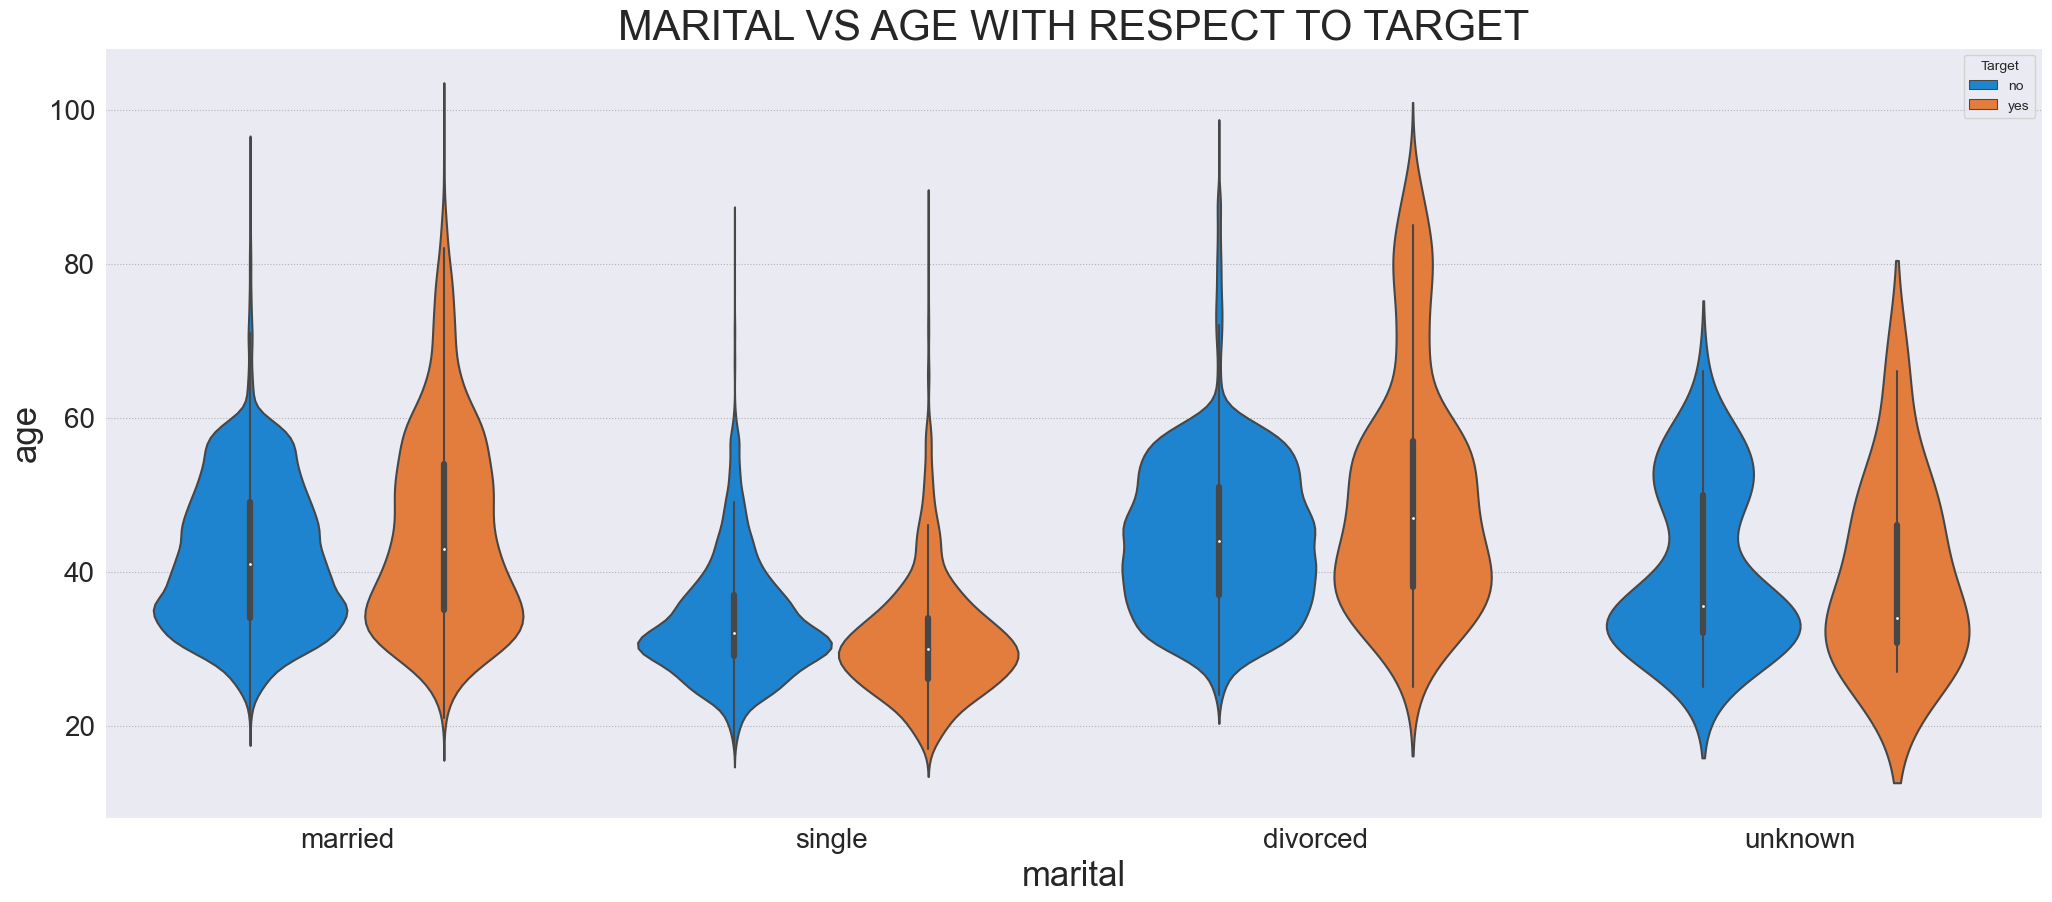

In [24]:
plt.figure(figsize=(25,10))
sns.violinplot(x='marital', y='age', data=data, hue='Target')
plt.title('MARITAL VS AGE WITH RESPECT TO TARGET',fontsize =30)
plt.xlabel('marital',fontsize =25)
plt.ylabel('age',fontsize =25)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

### OBSERVATION/INSIGHTS
- Divorced Customers which are divorced and age is over 40 years old are more likely higher rate of "Yes" subscriptions to the term deposit.

#### 4.	RELATION BETWEEN EDUCATION AND CONSUMER PRICE INDEX WITH RESPECT TO LOAN.

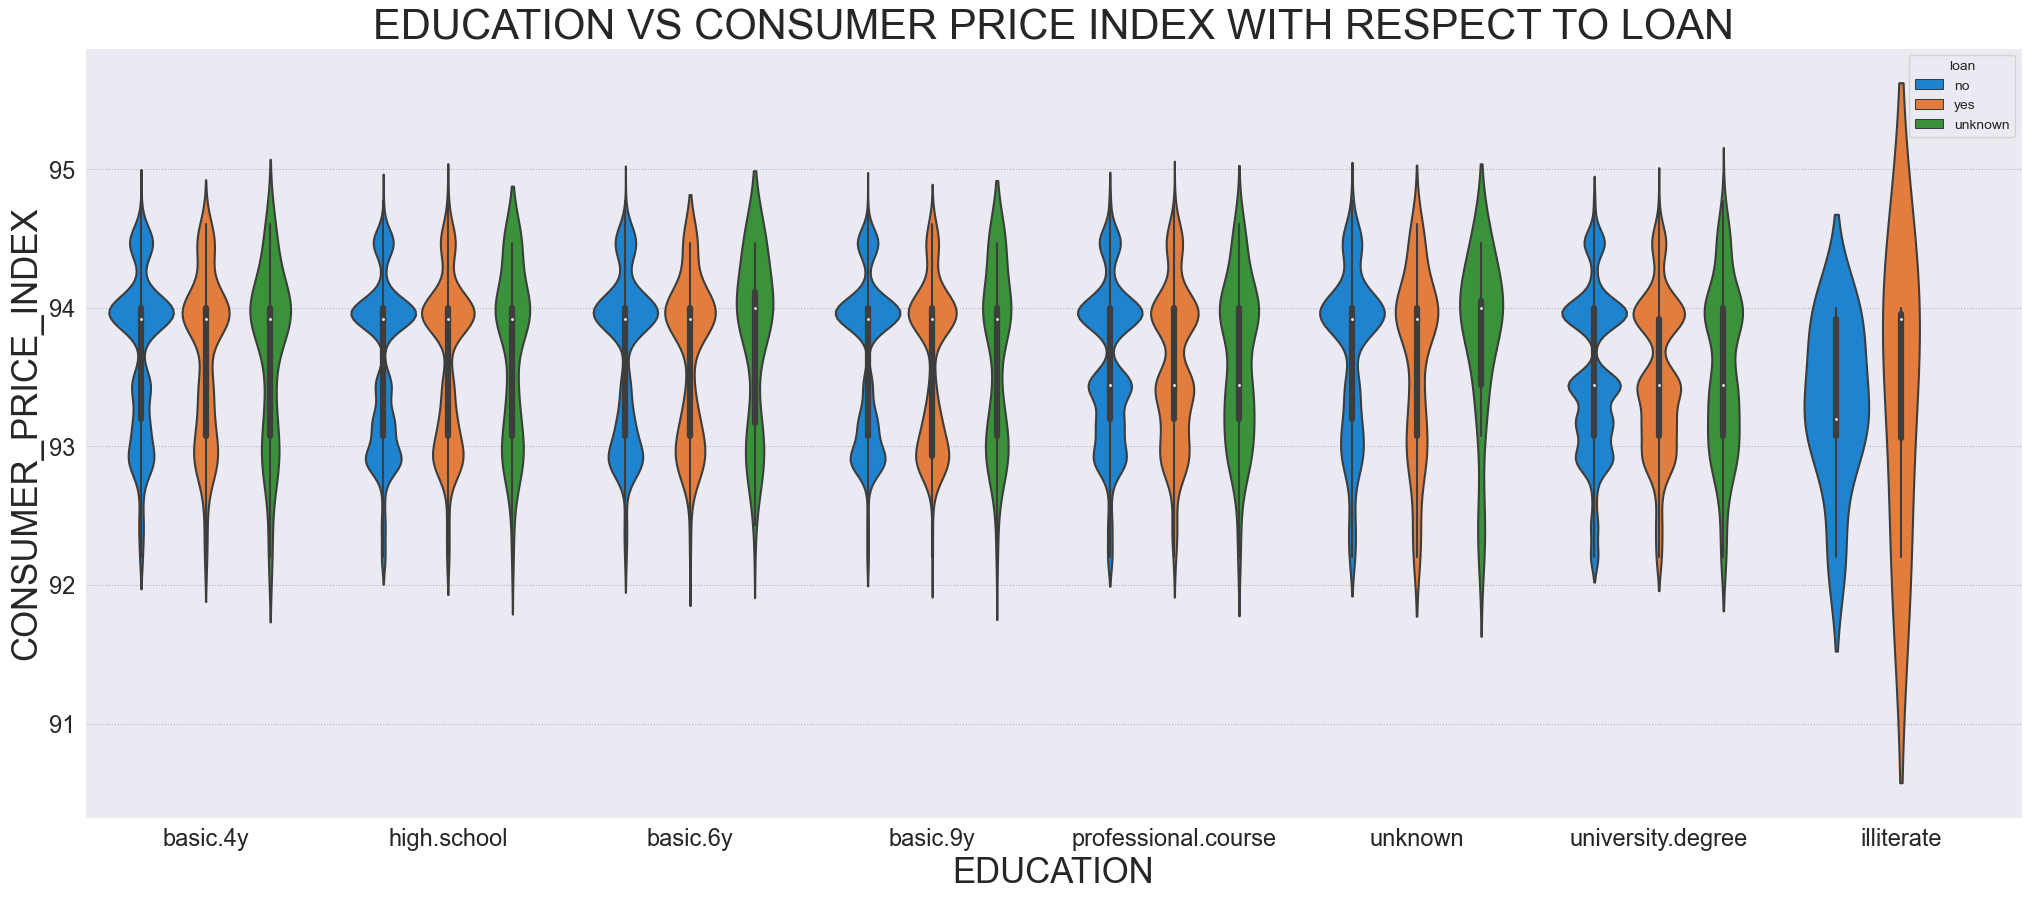

In [25]:
plt.figure(figsize=(25,10))
sns.violinplot(x='education', y='cons_price_idx', data=data, hue='loan')
plt.title('EDUCATION VS CONSUMER PRICE INDEX WITH RESPECT TO LOAN',fontsize =30)
plt.xlabel('EDUCATION',fontsize =25)
plt.ylabel('CONSUMER_PRICE_INDEX',fontsize =25)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.show()

### OBSERVATION/INSIGHTS
- Customers which are illiterate and consumer price is above 90 they have maximum loan.

#### 5.	RELATION BETWEEN CONTACT AND CAMPAIGN WITH RESPECT TO TARGET.

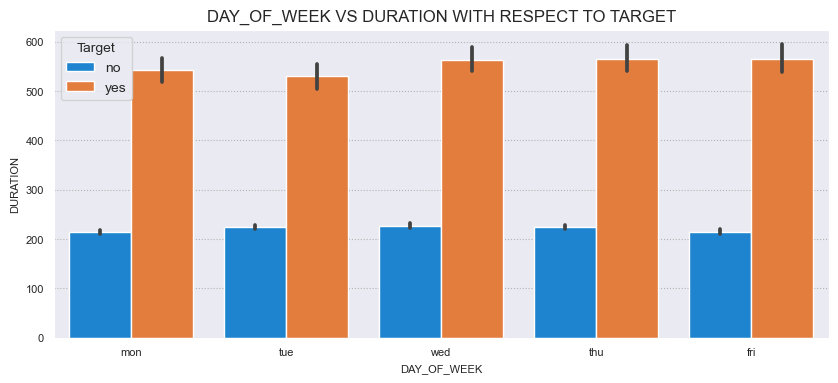

In [26]:
plt.figure(figsize=(10,4))
sns.barplot(x=data['day_of_week'], y=data['duration'], data=data, hue='Target')
plt.title('DAY_OF_WEEK VS DURATION WITH RESPECT TO TARGET',fontsize =12)
plt.xlabel('DAY_OF_WEEK',fontsize =8)
plt.ylabel('DURATION',fontsize =8)
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.show()

### OBSERVATION/INSIGHTS

#### RELATION BETWEEN DAY_OF_WEEK AND DURATION WITH RESPECT TO TARGET.

- when the conversation with customers lasts longer on weekdays, they are more inclined to subscribe. However, if the duration of the conversation is shorter, customers are less interested in subscribing, especially on weekdays.

#### RELATIONSHIP BETWEEN CONTACT VS DURATION WITH RESPECT TO TARGET

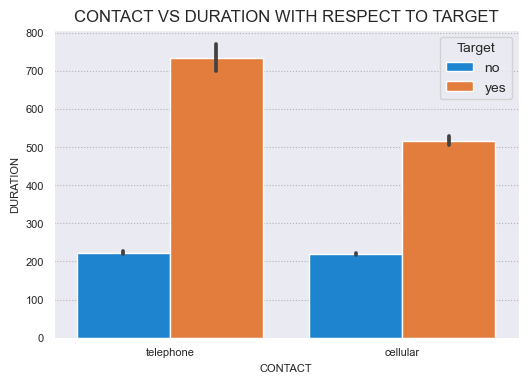

In [27]:
plt.figure(figsize=(6,4))
sns.barplot(x=data['contact'], y=data['duration'], data=data, hue='Target')
plt.title('CONTACT VS DURATION WITH RESPECT TO TARGET',fontsize =12)
plt.xlabel('CONTACT',fontsize =8)
plt.ylabel('DURATION',fontsize =8)
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.show()

### OBSERVATION/INSIGHTS

#### RELATION BETWEEN CONTACT AND DURATION WITH RESPECT TO TARGET.

- when the call duration with customers lasts longer on telephone, they are more inclined to subscribe. However, if the duration with customers are less interested in subscribing, especially on cellular.

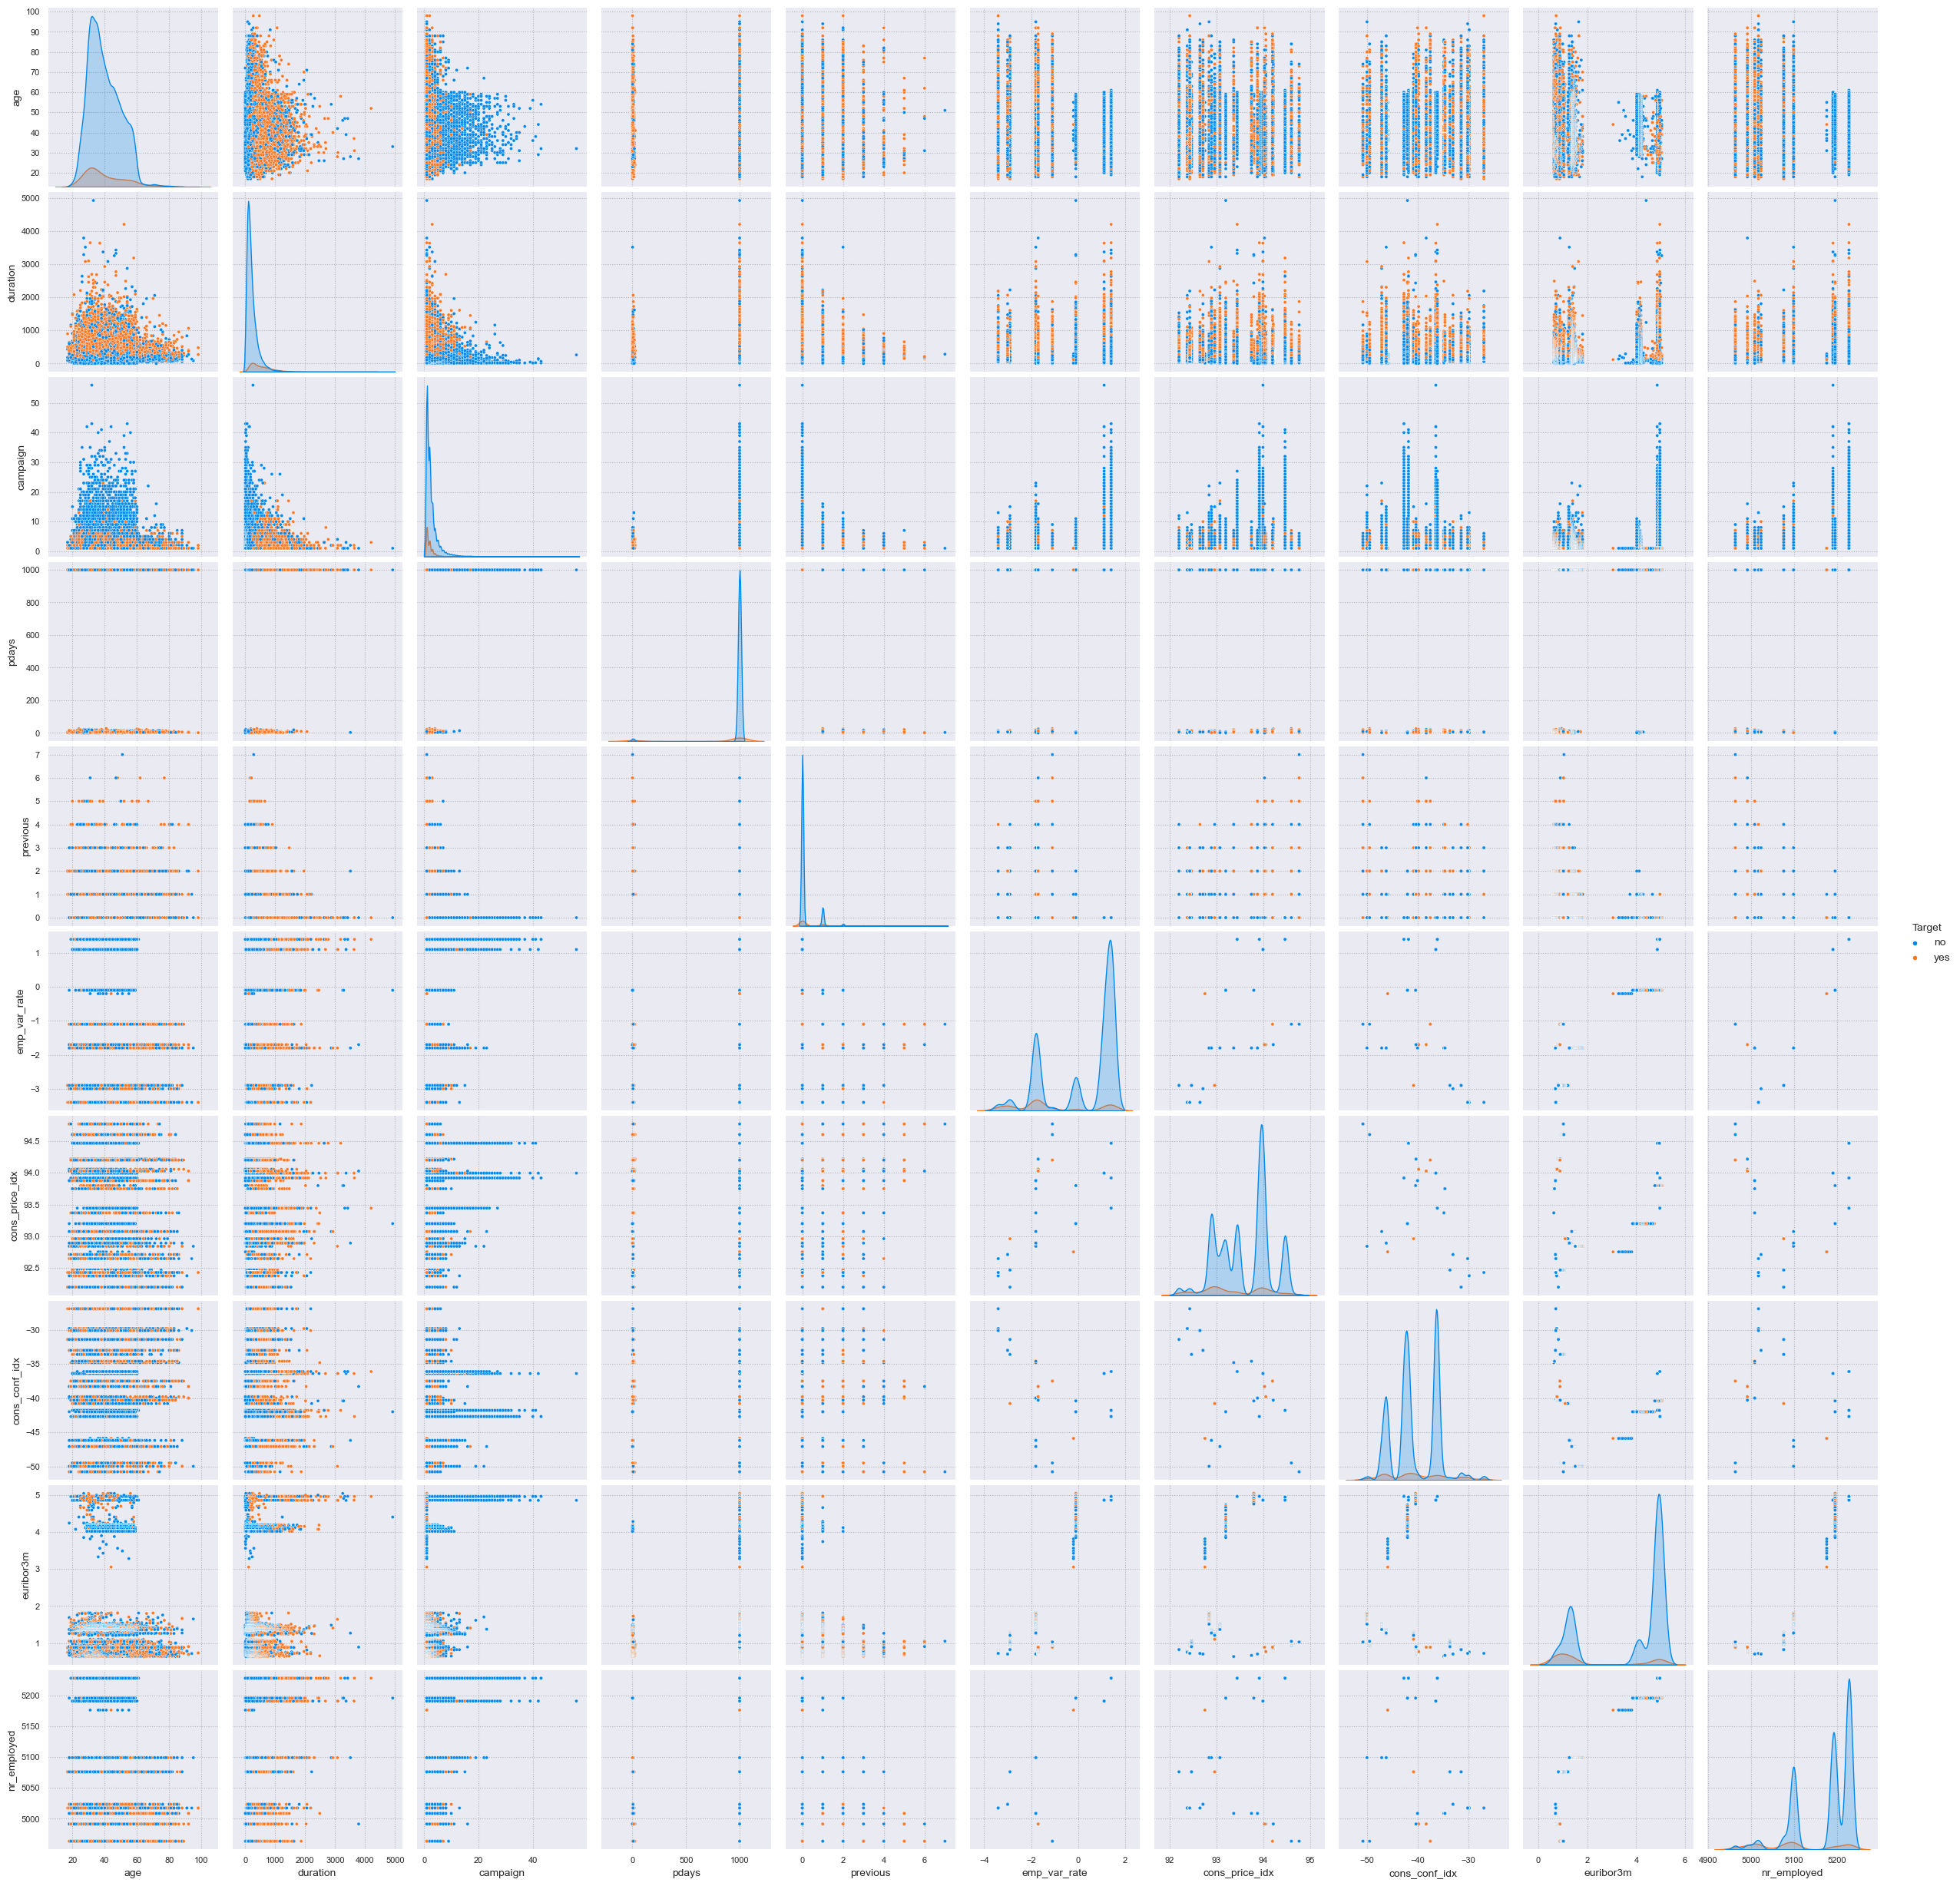

In [28]:
sns.pairplot(data,hue="Target")
plt.show()

## DATA PREPROCESSING

### 1. HANDLE MISSING VALUES

In [29]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
Target            0
dtype: int64

#### There is no missing value present in the given dataset.

### 2. HANDLE CATEGORICAL DATA

#### 1. JOB

In [30]:
data["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [31]:
data.loc[data["job"]=='admin.','job']=11
data.loc[data["job"]=='blue-collar','job']=10
data.loc[data["job"]=='technician','job']=9
data.loc[data["job"]=='services','job']=8
data.loc[data["job"]=='management','job']=7
data.loc[data["job"]=='retired','job']=6
data.loc[data["job"]=='entrepreneur','job']=5
data.loc[data["job"]=='self-employed','job']=4
data.loc[data["job"]=='housemaid','job']=3
data.loc[data["job"]=='unemployed',"job"]=2
data.loc[data["job"]=='student',"job"]=1
data.loc[data["job"]=='unknown',"job"]=0

#### 2.MARITAL

In [32]:
data["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [33]:
data["marital"]=data["marital"].map({"unknown":0,"divorced":1,"single":2,"married":3})

#### 3. EDUCATION

In [34]:
data["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [35]:
data.loc[data["education"]=='university.degree','education']=7
data.loc[data["education"]=='high.school','education']=6
data.loc[data["education"]=='basic.9y','education']=5
data.loc[data["education"]=='professional.course','education']=4
data.loc[data["education"]=='basic.4y','education']=3
data.loc[data["education"]=='basic.6y',"education"]=2
data.loc[data["education"]=='unknown',"education"]=1
data.loc[data["education"]=='illiterate',"education"]=0

#### 4. DEFAULT

In [36]:
data["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [37]:
data["default"]=data["default"].map({"yes":0,"unknown":1,"no":2})

#### 5. HOUSING

In [38]:
data["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [39]:
data["housing"]=data["housing"].map({"unknown":0,"no":1,"yes":2})

#### 6. LOAN

In [40]:
data["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [41]:
data["loan"]=data["loan"].map({"unknown":0,"yes":1,"no":2})

#### 7. CONTACT

In [42]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [43]:
data["contact"]=data["contact"].map({"telephone":0,"cellular":1})

#### 8. MONTH

In [44]:
data["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [45]:
data.loc[data["month"]=='may','month']=9
data.loc[data["month"]=='jul','month']=8
data.loc[data["month"]=='aug','month']=7
data.loc[data["month"]=='jun','month']=6
data.loc[data["month"]=='nov','month']=5
data.loc[data["month"]=='apr','month']=4
data.loc[data["month"]=='oct','month']=3
data.loc[data["month"]=='sep',"month"]=2
data.loc[data["month"]=='mar',"month"]=1
data.loc[data["month"]=='dec',"month"]=0

#### 9. DAY_OF_WEEK

In [46]:
data["day_of_week"].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [47]:
data["day_of_week"]=data["day_of_week"].map({"fri":0,"tue":1,"wed":2,"mon":3,"thu":4})

#### 10. POUTCOME

In [48]:
data["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [49]:
data['poutcome']=data["poutcome"].map({"success":0,"failure":1,"nonexistent":2})

#### 11. TARGET

In [50]:
data["Target"].value_counts()

no     36548
yes     4640
Name: Target, dtype: int64

In [51]:
data["Target"]=data["Target"].map({"yes":0,"no":1})

In [52]:
categorical_columns = ['job', 'education', 'month']
data[categorical_columns] = data[categorical_columns].astype(int)

### 3. HANDLE OUTLIER

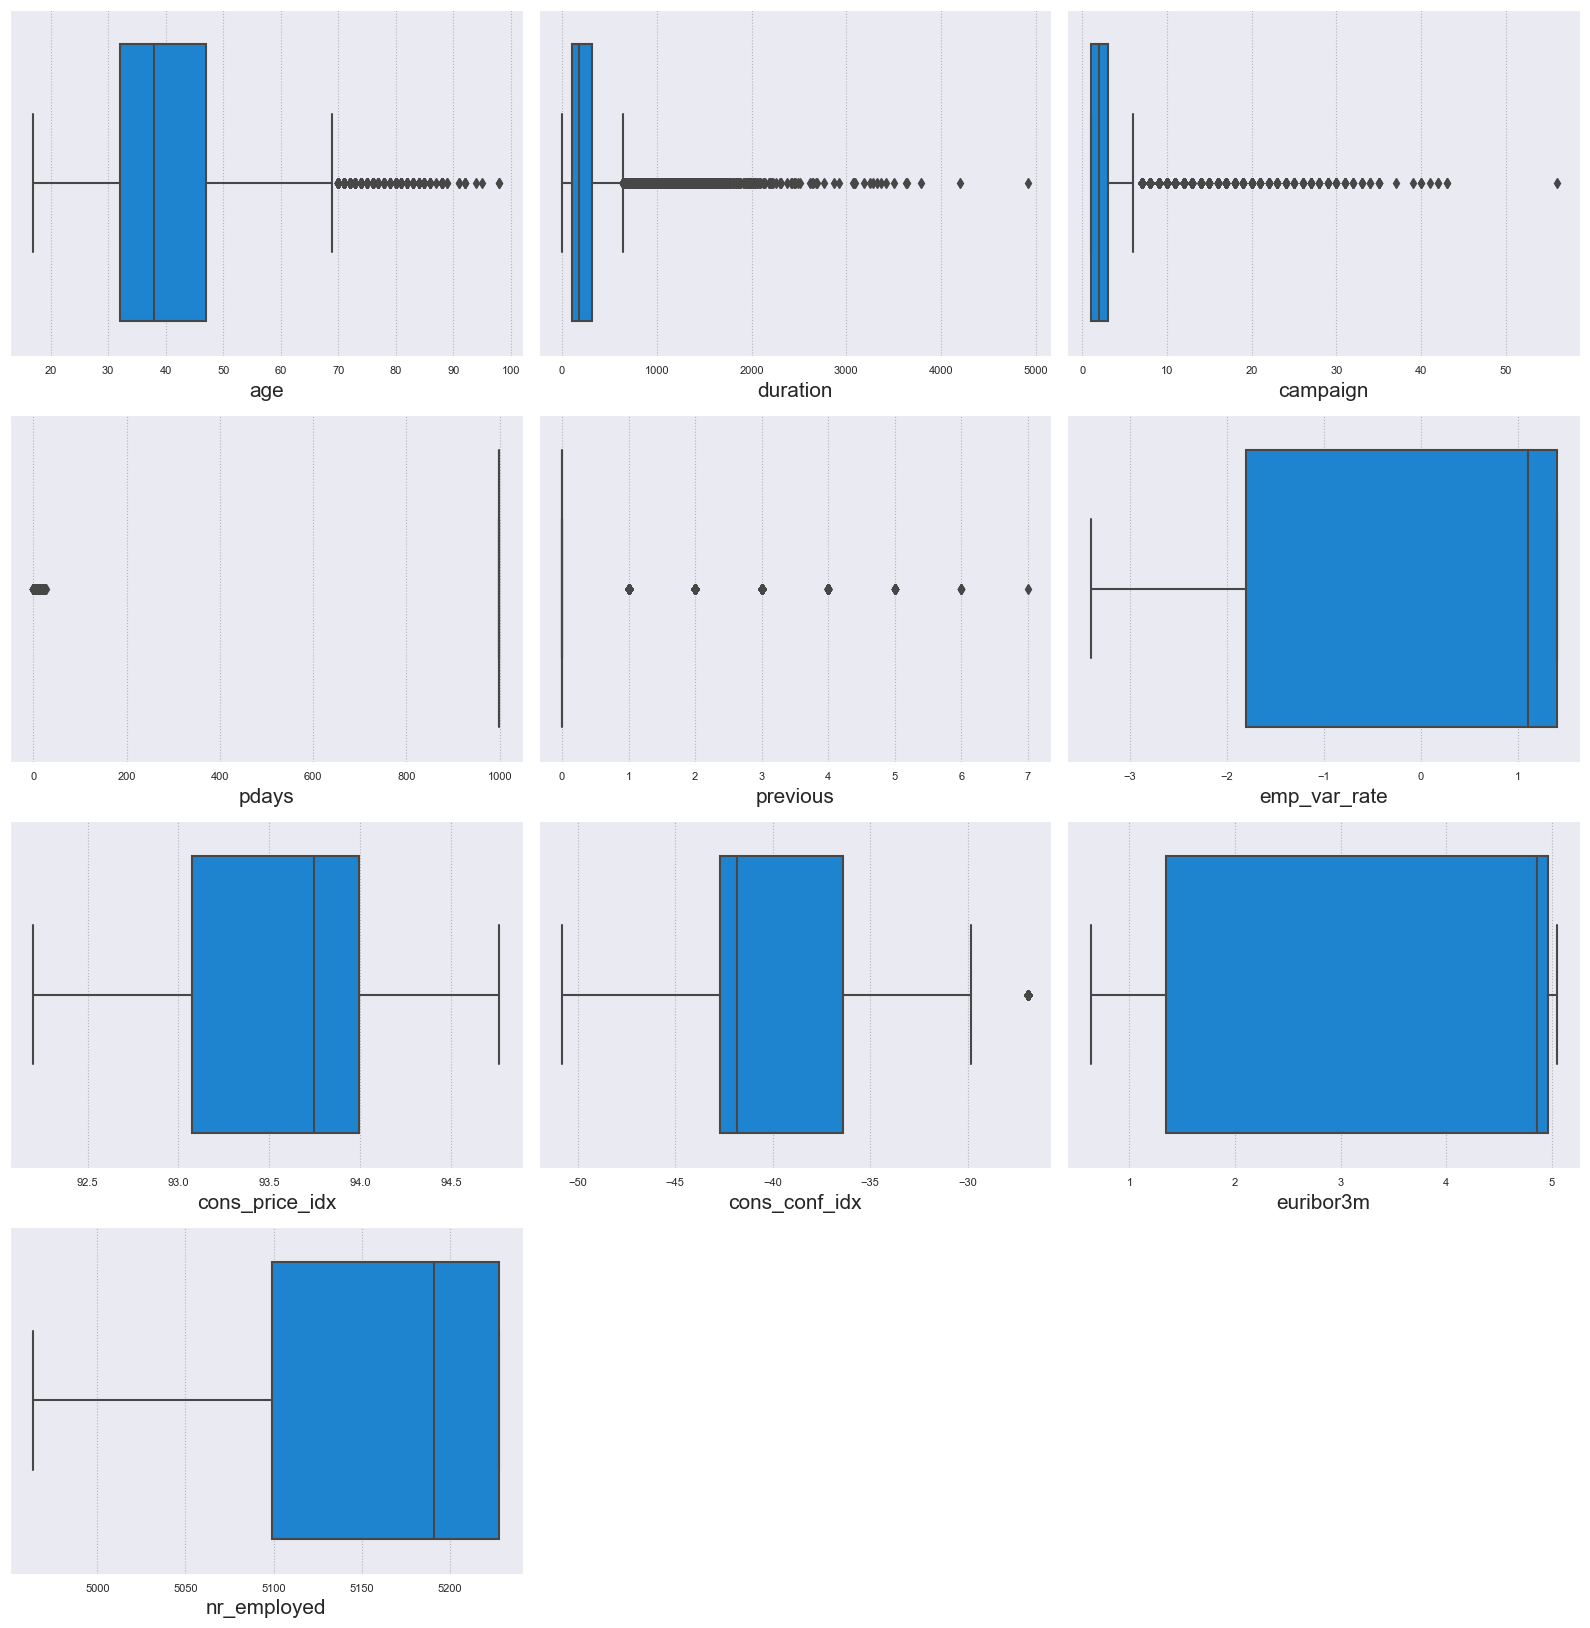

In [53]:
plt.figure(figsize=(16,20),facecolor="white")
plotnumber=1

for column in num_data:
    if plotnumber<=len(num_data):
        plt.subplot(5,3,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

#### CHECKING THE DISTRIBUTION BEFORE HANDLE THE OUTLIER

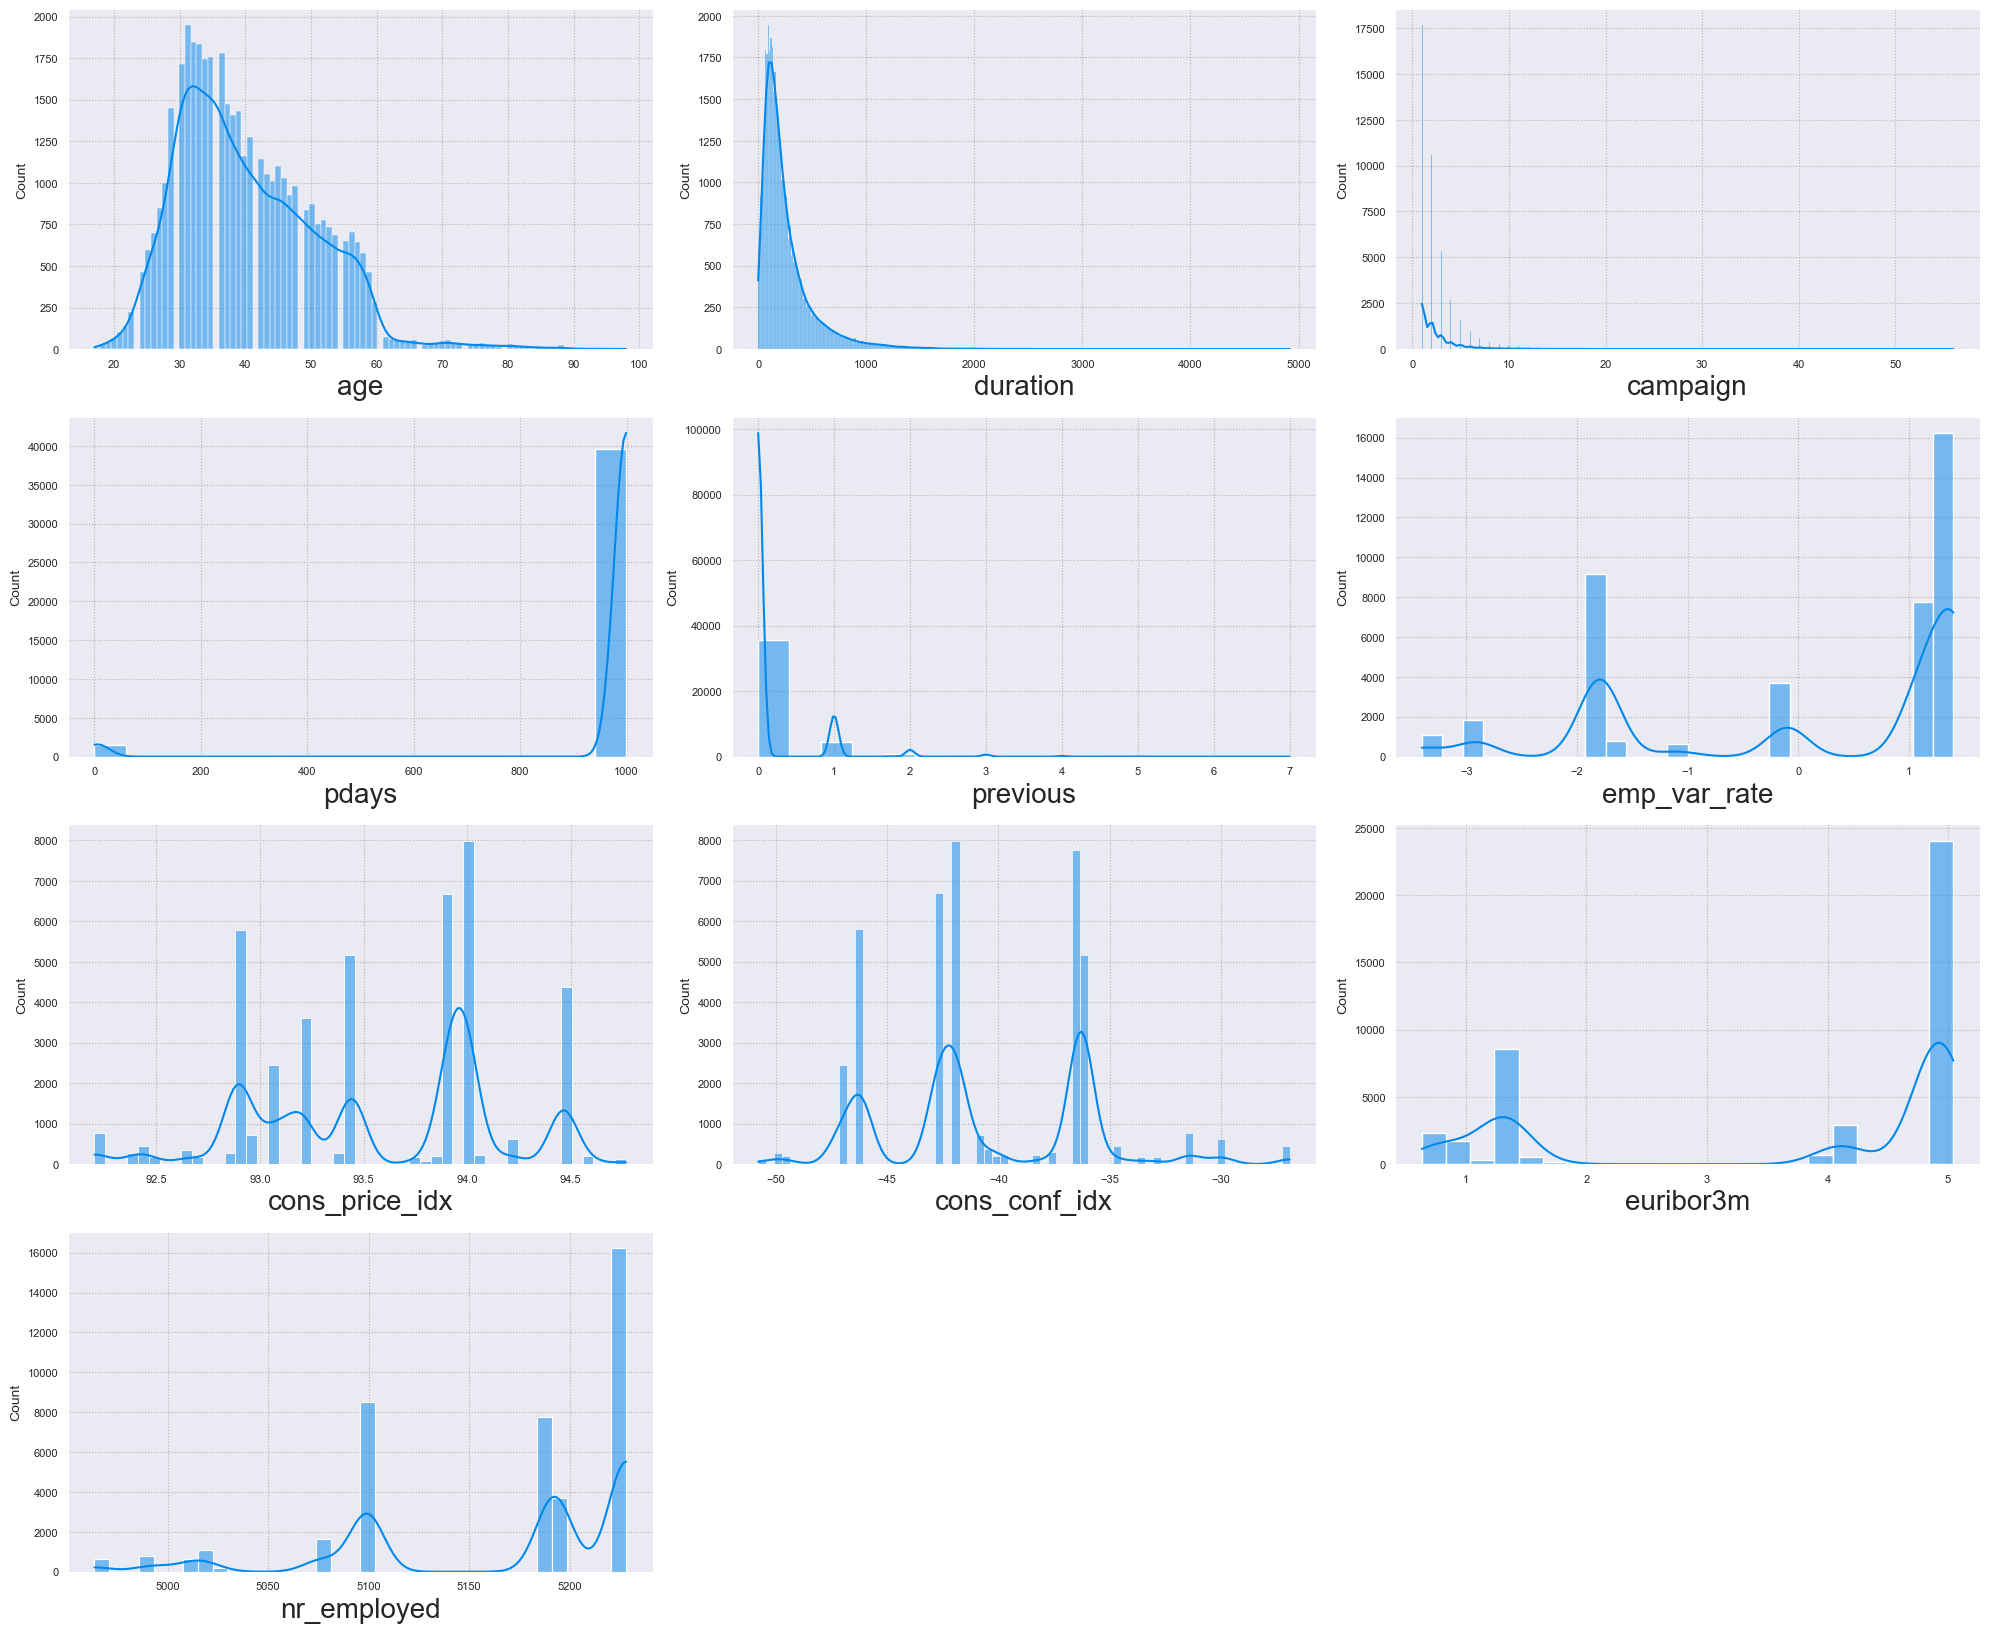

In [54]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1

for column in num_data:
    if plotnumber<=len(num_data):
        plt.subplot(5,3,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### 1. AGE

In [55]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

print("lower quantile",Q1)
print("upper quantile",Q3)

IQR = Q3 - Q1
print(f"IQR is",IQR)

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

print("Lower_limit",lower_limit)
print("Upper_limit",upper_limit)

lower quantile 32.0
upper quantile 47.0
IQR is 15.0
Lower_limit 9.5
Upper_limit 69.5


In [56]:
data.loc[data['age']>upper_limit]

age  job  marital  education  default  housing  loan  contact  month  \
27713   70    6        1          3        2        2     2        1      1   
27757   76    6        3          7        2        1     1        1      1   
27780   73    6        3          7        2        2     2        1      1   
27800   88    6        1          3        2        2     2        1      1   
27802   88    6        1          3        2        1     2        1      1   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
40986   84    6        1          3        1        2     1        1      3   
40996   81    6        3          3        2        2     2        1      3   
41004   80    6        3          4        2        2     2        1      3   
41183   73    6        3          4        2        2     2        1      5   
41187   74    6        3          4        2        2     2        1      5   

       day_of_week  duration  campaign  pdays  previous  poutcome  \
27713            3       187         3    999         0         2   
27757            4       167         9    999         0         2   
27780            1       179         1    999         1         1   
27800            2        48         1    999         0         2   
27802            2       266         2    999         0         2   
...            ...       ...       ...    ...       ...       ...   
40986            3       138         4      3         1         0   
40996            2       621         1    999         2         1   
41004            4       411         1    999         1         1   
41183            0       334         1    999         0         2   
41187            0       239         3    999         1         1   

       emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  \
27713          -1.8          92.843          -50.0      1.811       5099.1   
27757          -1.8          92.843          -50.0      1.757       5099.1   
27780          -1.8          92.843          -50.0      1.687       5099.1   
27800          -1.8          92.843          -50.0      1.663       5099.1   
27802          -1.8          92.843          -50.0      1.663       5099.1   
...             ...             ...            ...        ...          ...   
40986          -1.1          94.601          -49.5      1.000       4963.6   
40996          -1.1          94.601          -49.5      1.016       4963.6   
41004          -1.1          94.601          -49.5      1.025       4963.6   
41183          -1.1          94.767          -50.8      1.028       4963.6   
41187          -1.1          94.767          -50.8      1.028       4963.6   

       Target  
27713       0  
27757       1  
27780       1  
27800       1  
27802       0  
...       ...  
40986       1  
40996       0  
41004       0  
41183       0  
41187       1  

[469 rows x 21 columns]

In [57]:
len(data.loc[data['age']>upper_limit])/len(data)*100

1.1386811692726035

In [58]:
data.loc[data["age"]>upper_limit,"age"]=data["age"].median()

In [59]:
data.loc[data["age"]<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed, Target]
Index: []

#### 2. DURATION

In [60]:
Q1 = data["duration"].quantile(0.25)
Q3 = data["duration"].quantile(0.75)

print("lower quantile",Q1)
print("upper quantile",Q3)

IQR = Q3 - Q1
print(f"IQR is",IQR)

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

print("Lower_limit",lower_limit)
print("Upper_limit",upper_limit)

lower quantile 102.0
upper quantile 319.0
IQR is 217.0
Lower_limit -223.5
Upper_limit 644.5


In [61]:
data.loc[data["duration"]>upper_limit]

age  job  marital  education  default  housing  loan  contact  month  \
37      52    9        3          5        2        2     2        0      9   
57      45    8        3          6        1        2     2        0      9   
61      51   10        3          5        2        2     2        0      9   
75      41   10        1          3        1        2     2        0      9   
83      49    5        3          7        1        2     2        0      9   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41147   25    9        2          4        2        2     2        1      5   
41153   67    3        1          4        2        2     2        1      5   
41160   33   11        3          7        2        1     2        1      5   
41164   54   11        3          4        2        1     2        1      5   
41166   32   11        3          7        2        1     2        0      5   

       day_of_week  duration  campaign  pdays  previous  poutcome  \
37               3      1666         1    999         0         2   
57               3       787         1    999         0         2   
61               3       812         1    999         0         2   
75               3      1575         1    999         0         2   
83               3      1042         1    999         0         2   
...            ...       ...       ...    ...       ...       ...   
41147            0       712         2     19         1         0   
41153            3       655         2      5         5         0   
41160            1       843         1    999         0         2   
41164            1      1868         2     10         1         0   
41166            2       651         1    999         1         1   

       emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  \
37              1.1          93.994          -36.4      4.857       5191.0   
57              1.1          93.994          -36.4      4.857       5191.0   
61              1.1          93.994          -36.4      4.857       5191.0   
75              1.1          93.994          -36.4      4.857       5191.0   
83              1.1          93.994          -36.4      4.857       5191.0   
...             ...             ...            ...        ...          ...   
41147          -1.1          94.767          -50.8      1.040       4963.6   
41153          -1.1          94.767          -50.8      1.039       4963.6   
41160          -1.1          94.767          -50.8      1.035       4963.6   
41164          -1.1          94.767          -50.8      1.035       4963.6   
41166          -1.1          94.767          -50.8      1.030       4963.6   

       Target  
37          1  
57          1  
61          1  
75          0  
83          0  
...       ...  
41147       0  
41153       0  
41160       0  
41164       0  
41166       0  

[2963 rows x 21 columns]

In [62]:
len(data.loc[data["duration"]>upper_limit])/len(data)*100

7.193842866854423

In [63]:
data.loc[data["duration"]>upper_limit,"duration"]=data['duration'].median()

In [64]:
data.loc[data["duration"]<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed, Target]
Index: []

#### 3. CAMPAIGN

In [65]:
Q1 = data["campaign"].quantile(0.25)
Q3 = data["campaign"].quantile(0.75)

print("lower quantile",Q1)
print("upper quantile",Q3)

IQR = Q3 - Q1
print(f"IQR is", IQR)

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

print("Lower_limit",lower_limit)
print("Upper_limit",upper_limit)

lower quantile 1.0
upper quantile 3.0
IQR is 2.0
Lower_limit -2.0
Upper_limit 6.0


In [66]:
data.loc[data["campaign"]>upper_limit]

age  job  marital  education  default  housing  loan  contact  month  \
887     54   11        3          7        2        1     2        0      9   
1043    41    9        2          7        1        1     2        0      9   
1094    40    9        3          4        2        2     2        0      9   
1097    51   10        3          3        1        2     2        0      9   
1230    48   10        1          3        2        1     2        0      9   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
40611   38    6        3          5        2        1     2        0      2   
40631   38    6        3          3        2        2     2        1      2   
40698   29    9        2          4        2        2     2        1      2   
40821   33    9        2          4        2        2     2        1      2   
40993   50    5        1          7        2        2     2        0      3   

       day_of_week  duration  campaign  pdays  previous  poutcome  \
887              2       388         7    999         0         2   
1043             2        79         8    999         0         2   
1094             2       253         8    999         0         2   
1097             2       244         7    999         0         2   
1230             4       521         7    999         0         2   
...            ...       ...       ...    ...       ...       ...   
40611            0       543         9    999         1         1   
40631            3       213         7    999         0         2   
40698            3       157         7      3         5         0   
40821            0       246         9    999         2         1   
40993            1       180         7     11         2         0   

       emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  \
887             1.1          93.994          -36.4      4.856       5191.0   
1043            1.1          93.994          -36.4      4.856       5191.0   
1094            1.1          93.994          -36.4      4.856       5191.0   
1097            1.1          93.994          -36.4      4.856       5191.0   
1230            1.1          93.994          -36.4      4.855       5191.0   
...             ...             ...            ...        ...          ...   
40611          -1.1          94.199          -37.5      0.883       4963.6   
40631          -1.1          94.199          -37.5      0.882       4963.6   
40698          -1.1          94.199          -37.5      0.879       4963.6   
40821          -1.1          94.199          -37.5      0.879       4963.6   
40993          -1.1          94.601          -49.5      1.008       4963.6   

       Target  
887         1  
1043        1  
1094        1  
1097        1  
1230        1  
...       ...  
40611       1  
40631       1  
40698       1  
40821       1  
40993       0  

[2406 rows x 21 columns]

In [67]:
len(data.loc[data["campaign"]>upper_limit])/len(data)*100

5.8415072351170245

In [68]:
data.loc[data["campaign"]>upper_limit,"campaign"]=data["campaign"].median()

In [69]:
data.loc[data['campaign']<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed, Target]
Index: []

#### 4. PDAYS

In [70]:
# lower_limit
lower_limit=data["pdays"].mean()-3*data["pdays"].std()
print("Lower_limit",lower_limit)

# upper_limit
upper_limit=data["pdays"].mean()+3*data["pdays"].std()
print("Upper_limit",upper_limit)

Lower_limit 401.74273198150195
Upper_limit 1523.2081760499636


In [71]:
data.loc[data["pdays"]>upper_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed, Target]
Index: []

In [72]:
data.loc[data["pdays"]<lower_limit]

age  job  marital  education  default  housing  loan  contact  month  \
24108   37   11        3          7        2        2     2        0      5   
24264   48    7        3          7        2        2     2        1      5   
24279   42    9        3          4        1        2     2        1      5   
24397   50    5        3          7        1        2     2        1      5   
24482   36    4        2          7        2        2     2        1      5   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41163   35    9        1          3        2        2     2        1      5   
41164   54   11        3          4        2        1     2        1      5   
41174   62    6        3          7        2        2     2        1      5   
41178   62    6        3          7        2        1     2        1      5   
41182   29    2        2          3        2        2     2        1      5   

       day_of_week  duration  campaign  pdays  previous  poutcome  \
24108            2       119         1      6         1         0   
24264            3       112         1      4         1         0   
24279            3        94         1      4         1         0   
24397            3        77         1      3         1         0   
24482            3       200         2      4         1         0   
...            ...       ...       ...    ...       ...       ...   
41163            1       385         3      4         2         0   
41164            1       180         2     10         1         0   
41174            4       208         1      1         6         0   
41178            4       483         2      6         3         0   
41182            0       112         1      9         1         0   

       emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  \
24108          -0.1          93.200          -42.0      4.286       5195.8   
24264          -0.1          93.200          -42.0      4.191       5195.8   
24279          -0.1          93.200          -42.0      4.191       5195.8   
24397          -0.1          93.200          -42.0      4.191       5195.8   
24482          -0.1          93.200          -42.0      4.191       5195.8   
...             ...             ...            ...        ...          ...   
41163          -1.1          94.767          -50.8      1.035       4963.6   
41164          -1.1          94.767          -50.8      1.035       4963.6   
41174          -1.1          94.767          -50.8      1.031       4963.6   
41178          -1.1          94.767          -50.8      1.031       4963.6   
41182          -1.1          94.767          -50.8      1.028       4963.6   

       Target  
24108       1  
24264       1  
24279       1  
24397       1  
24482       1  
...       ...  
41163       0  
41164       0  
41174       0  
41178       0  
41182       1  

[1515 rows x 21 columns]

In [73]:
len(data.loc[data["pdays"]<lower_limit])/len(data)*100

3.6782558026609693

In [74]:
data.loc[data['pdays']<lower_limit,"pdays"]=data["pdays"].mean()

#### 5. PREVIOUS

In [75]:
# lower_limit
lower_limit=data["previous"].mean()-3*data["previous"].std()
print("Lower_limit",lower_limit)

# upper_limit
upper_limit=data["previous"].mean()+3*data["previous"].std()
print("Upper_limit",upper_limit)

Lower_limit -1.3117402405862273
Upper_limit 1.6576662384496825


In [76]:
data.loc[data["previous"]>upper_limit]

age  job  marital  education  default  housing  loan  contact  month  \
25996   35    7        3          7        2        2     1        0      5   
27658   50   11        1          7        2        2     2        1      5   
27778   38    9        3          7        2        1     2        1      1   
27832   30    1        2          6        2        1     2        1      1   
27991   29   11        2          7        2        2     2        1      4   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41170   40    7        1          7        2        2     2        1      5   
41173   62    6        3          7        2        2     2        1      5   
41174   62    6        3          7        2        2     2        1      5   
41175   34    1        2          1        2        2     2        1      5   
41178   62    6        3          7        2        1     2        1      5   

       day_of_week  duration  campaign       pdays  previous  poutcome  \
25996            2       377         3  962.475454         2         0   
27658            0        72         3  962.475454         2         0   
27778            1       350         2  999.000000         2         1   
27832            0       268         5  962.475454         2         1   
27991            2       513         1  962.475454         2         0   
...            ...       ...       ...         ...       ...       ...   
41170            2       293         2  999.000000         4         1   
41173            4       329         1  999.000000         2         1   
41174            4       208         1  962.475454         6         0   
41175            4       180         1  999.000000         2         1   
41178            4       483         2  962.475454         3         0   

       emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  \
25996          -0.1          93.200          -42.0      4.120       5195.8   
27658          -0.1          93.200          -42.0      4.021       5195.8   
27778          -1.8          92.843          -50.0      1.687       5099.1   
27832          -1.8          92.843          -50.0      1.640       5099.1   
27991          -1.8          93.075          -47.1      1.498       5099.1   
...             ...             ...            ...        ...          ...   
41170          -1.1          94.767          -50.8      1.030       4963.6   
41173          -1.1          94.767          -50.8      1.031       4963.6   
41174          -1.1          94.767          -50.8      1.031       4963.6   
41175          -1.1          94.767          -50.8      1.031       4963.6   
41178          -1.1          94.767          -50.8      1.031       4963.6   

       Target  
25996       1  
27658       1  
27778       0  
27832       0  
27991       1  
...       ...  
41170       1  
41173       0  
41174       0  
41175       1  
41178       0  

[1064 rows x 21 columns]

In [77]:
data.loc[data["previous"]<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed, Target]
Index: []

In [78]:
len(data.loc[data["previous"]>upper_limit])/len(data)*100

2.583276682528892

In [79]:
data.loc[data["previous"]>upper_limit,"previous"]=data["previous"].mean()

#### 6. CONS.CONF.IDX

In [80]:
Q1 = data["cons_conf_idx"].quantile(0.25)
Q3 = data["cons_conf_idx"].quantile(0.75)

print("lower quantile",Q1)
print("upper quantile",Q3)

IQR = Q3 - Q1
print(f"IQR is",IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print("Lower_limit",lower_limit)
print("Upper_limit",upper_limit)

lower quantile -42.7
upper quantile -36.4
IQR is 6.300000000000004
Lower_limit -52.150000000000006
Upper_limit -26.949999999999992


In [81]:
data.loc[data["cons_conf_idx"]>upper_limit]

age  job  marital  education  default  housing  loan  contact  month  \
38154   50    7        3          7        2        2     2        1      3   
38155   37   11        2          7        2        2     2        1      3   
38156   59    9        2          2        2        1     2        1      3   
38157   31   11        3          7        2        2     2        1      3   
38158   35   11        3          6        2        2     2        1      3   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
38596   69    6        3          3        2        2     1        1      3   
38597   18    1        2          2        2        1     1        1      3   
38598   59    6        1          3        2        2     2        0      3   
38599   37   11        2          7        2        1     2        1      3   
38600   38    6        1          2        2        1     2        0      3   

       day_of_week  duration  campaign       pdays  previous  poutcome  \
38154            4       305         2  962.475454  1.000000         0   
38155            4       447         3  999.000000  0.000000         2   
38156            4        86         1  999.000000  0.172963         1   
38157            4       180         1  999.000000  0.000000         2   
38158            4       194         1  962.475454  1.000000         0   
...            ...       ...       ...         ...       ...       ...   
38596            0       257         3  999.000000  0.000000         2   
38597            0       368         2  999.000000  0.000000         2   
38598            0       152         4  999.000000  0.000000         2   
38599            0       416         2  999.000000  0.000000         2   
38600            0       177         2  999.000000  0.000000         2   

       emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  \
38154          -3.4          92.431          -26.9      0.754       5017.5   
38155          -3.4          92.431          -26.9      0.754       5017.5   
38156          -3.4          92.431          -26.9      0.754       5017.5   
38157          -3.4          92.431          -26.9      0.754       5017.5   
38158          -3.4          92.431          -26.9      0.754       5017.5   
...             ...             ...            ...        ...          ...   
38596          -3.4          92.431          -26.9      0.720       5017.5   
38597          -3.4          92.431          -26.9      0.720       5017.5   
38598          -3.4          92.431          -26.9      0.720       5017.5   
38599          -3.4          92.431          -26.9      0.720       5017.5   
38600          -3.4          92.431          -26.9      0.720       5017.5   

       Target  
38154       0  
38155       0  
38156       1  
38157       1  
38158       0  
...       ...  
38596       0  
38597       0  
38598       1  
38599       0  
38600       1  

[447 rows x 21 columns]

In [82]:
len(data.loc[data["cons_conf_idx"]>upper_limit])/len(data)*100

1.0852675536564047

In [83]:
data.loc[data["cons_conf_idx"]>upper_limit,"cons_conf_idx"]=data["cons_conf_idx"].median()

In [84]:
data.loc[data["cons_conf_idx"]<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed, Target]
Index: []

### 4. SCALING

In [85]:
import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[["age","emp_var_rate","cons_price_idx","cons_conf_idx","euribor3m","nr_employed",
      "pdays","previous","duration"]] = sc.fit_transform(data[["age","emp_var_rate","cons_price_idx","cons_conf_idx","euribor3m","nr_employed","pdays","previous","duration"]]) 

In [86]:
data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0  1.706581    3        3          3        2        1     2        0      9   
1  1.810519    8        3          6        1        1     2        0      9   
2 -0.268244    8        3          6        2        2     2        0      9   
3  0.043571   11        3          2        2        1     2        0      9   
4  1.706581    8        3          6        2        1     1        0      9   

   day_of_week  duration  campaign     pdays  previous  poutcome  \
0            3  0.436958         1  0.195415 -0.367562         2   
1            3 -0.386685         1  0.195415 -0.367562         2   
2            3  0.179569         1  0.195415 -0.367562         2   
3            3 -0.371977         1  0.195415 -0.367562         2   
4            3  0.775240         1  0.195415 -0.367562         2   

   emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  Target  
0      0.648092        0.722722       0.968067    0.71246      0.33168       1  
1      0.648092        0.722722       0.968067    0.71246      0.33168       1  
2      0.648092        0.722722       0.968067    0.71246      0.33168       1  
3      0.648092        0.722722       0.968067    0.71246      0.33168       1  
4      0.648092        0.722722       0.968067    0.71246      0.33168       1

## FEATURE ENGINERING

### 1. CHECK CORRELATION

In [87]:
data.corr()

age       job   marital  education   default   housing  \
age             1.000000 -0.068558  0.133353  -0.159552 -0.190996 -0.003769   
job            -0.068558  1.000000 -0.004706   0.085621  0.027061  0.001348   
marital         0.133353 -0.004706  1.000000  -0.104975 -0.103930 -0.003643   
education      -0.159552  0.085621 -0.104975   1.000000  0.196636  0.015171   
default        -0.190996  0.027061 -0.103930   0.196636  1.000000  0.017586   
housing        -0.003769  0.001348 -0.003643   0.015171  0.017586  1.000000   
loan            0.005932 -0.003553  0.001719  -0.005054  0.000970  0.234192   
contact        -0.032983  0.001279 -0.043564   0.089817  0.135238  0.083498   
month          -0.039773  0.083713  0.014439  -0.064537 -0.131119 -0.028217   
day_of_week    -0.015989 -0.010438 -0.005166   0.010334  0.004100  0.024110   
duration        0.003689 -0.009279 -0.004328  -0.016893  0.015383 -0.006476   
campaign        0.010070  0.019445 -0.010764  -0.003426 -0.026526 -0.005429   
pdays           0.006126  0.058824  0.017659  -0.017993 -0.080066 -0.010347   
previous       -0.018793 -0.022335 -0.027987   0.020615  0.087068  0.022747   
poutcome        0.017959  0.051373  0.030627  -0.025132 -0.108159 -0.021599   
emp_var_rate    0.070915  0.072007  0.048931  -0.049010 -0.203263 -0.055645   
cons_price_idx  0.036777  0.021254  0.024995  -0.086524 -0.168073 -0.079528   
cons_conf_idx   0.101175 -0.033074  0.052861   0.012964 -0.044095 -0.035225   
euribor3m       0.083770  0.064245  0.054623  -0.040451 -0.195336 -0.054698   
nr_employed     0.067991  0.086439  0.050058  -0.029689 -0.189845 -0.040855   
Target          0.020232  0.055852  0.026302  -0.026791 -0.099352 -0.011379   

                    loan   contact     month  day_of_week  duration  campaign  \
age             0.005932 -0.032983 -0.039773    -0.015989  0.003689  0.010070   
job            -0.003553  0.001279  0.083713    -0.010438 -0.009279  0.019445   
marital         0.001719 -0.043564  0.014439    -0.005166 -0.004328 -0.010764   
education      -0.005054  0.089817 -0.064537     0.010334 -0.016893 -0.003426   
default         0.000970  0.135238 -0.131119     0.004100  0.015383 -0.026526   
housing         0.234192  0.083498 -0.028217     0.024110 -0.006476 -0.005429   
loan            1.000000  0.004391 -0.006795     0.006694  0.013312 -0.008769   
contact         0.004391  1.000000 -0.226851     0.052376  0.029764 -0.043548   
month          -0.006795 -0.226851  1.000000    -0.032484 -0.002782  0.074921   
day_of_week     0.006694  0.052376 -0.032484     1.000000  0.008462 -0.012911   
duration        0.013312  0.029764 -0.002782     0.008462  1.000000 -0.052996   
campaign       -0.008769 -0.043548  0.074921    -0.012911 -0.052996  1.000000   
pdays          -0.001314 -0.117965  0.173868    -0.010023 -0.072776  0.044961   
previous       -0.000588  0.224898 -0.140193    -0.005923  0.022101 -0.057201   
poutcome       -0.000581 -0.226813  0.201397     0.000095 -0.056181  0.065016   
emp_var_rate   -0.003055 -0.393584  0.313826    -0.005231 -0.058853  0.097183   
cons_price_idx -0.006315 -0.591474  0.181645    -0.011271 -0.005718  0.073688   
cons_conf_idx   0.004159 -0.282487  0.087586    -0.041820  0.003219 -0.007044   
euribor3m      -0.001547 -0.399773  0.273407    -0.012444 -0.065756  0.081501   
nr_employed    -0.002464 -0.269155  0.288111    -0.002146 -0.085575  0.092293   
Target         -0.005038 -0.144773  0.222684    -0.003525 -0.210642  0.047044   

                   pdays  previous  poutcome  emp_var_rate  cons_price_idx  \
age             0.006126 -0.018793  0.017959      0.070915        0.036777   
job             0.058824 -0.022335  0.051373      0.072007        0.021254   
marital         0.017659 -0.027987  0.030627      0.048931        0.024995   
education      -0.017993  0.020615 -0.025132     -0.049010       -0.086524   
default        -0.080066  0.087068 -0.108159     -0.203263       -0.168073   
housing        -0.010347  0.022

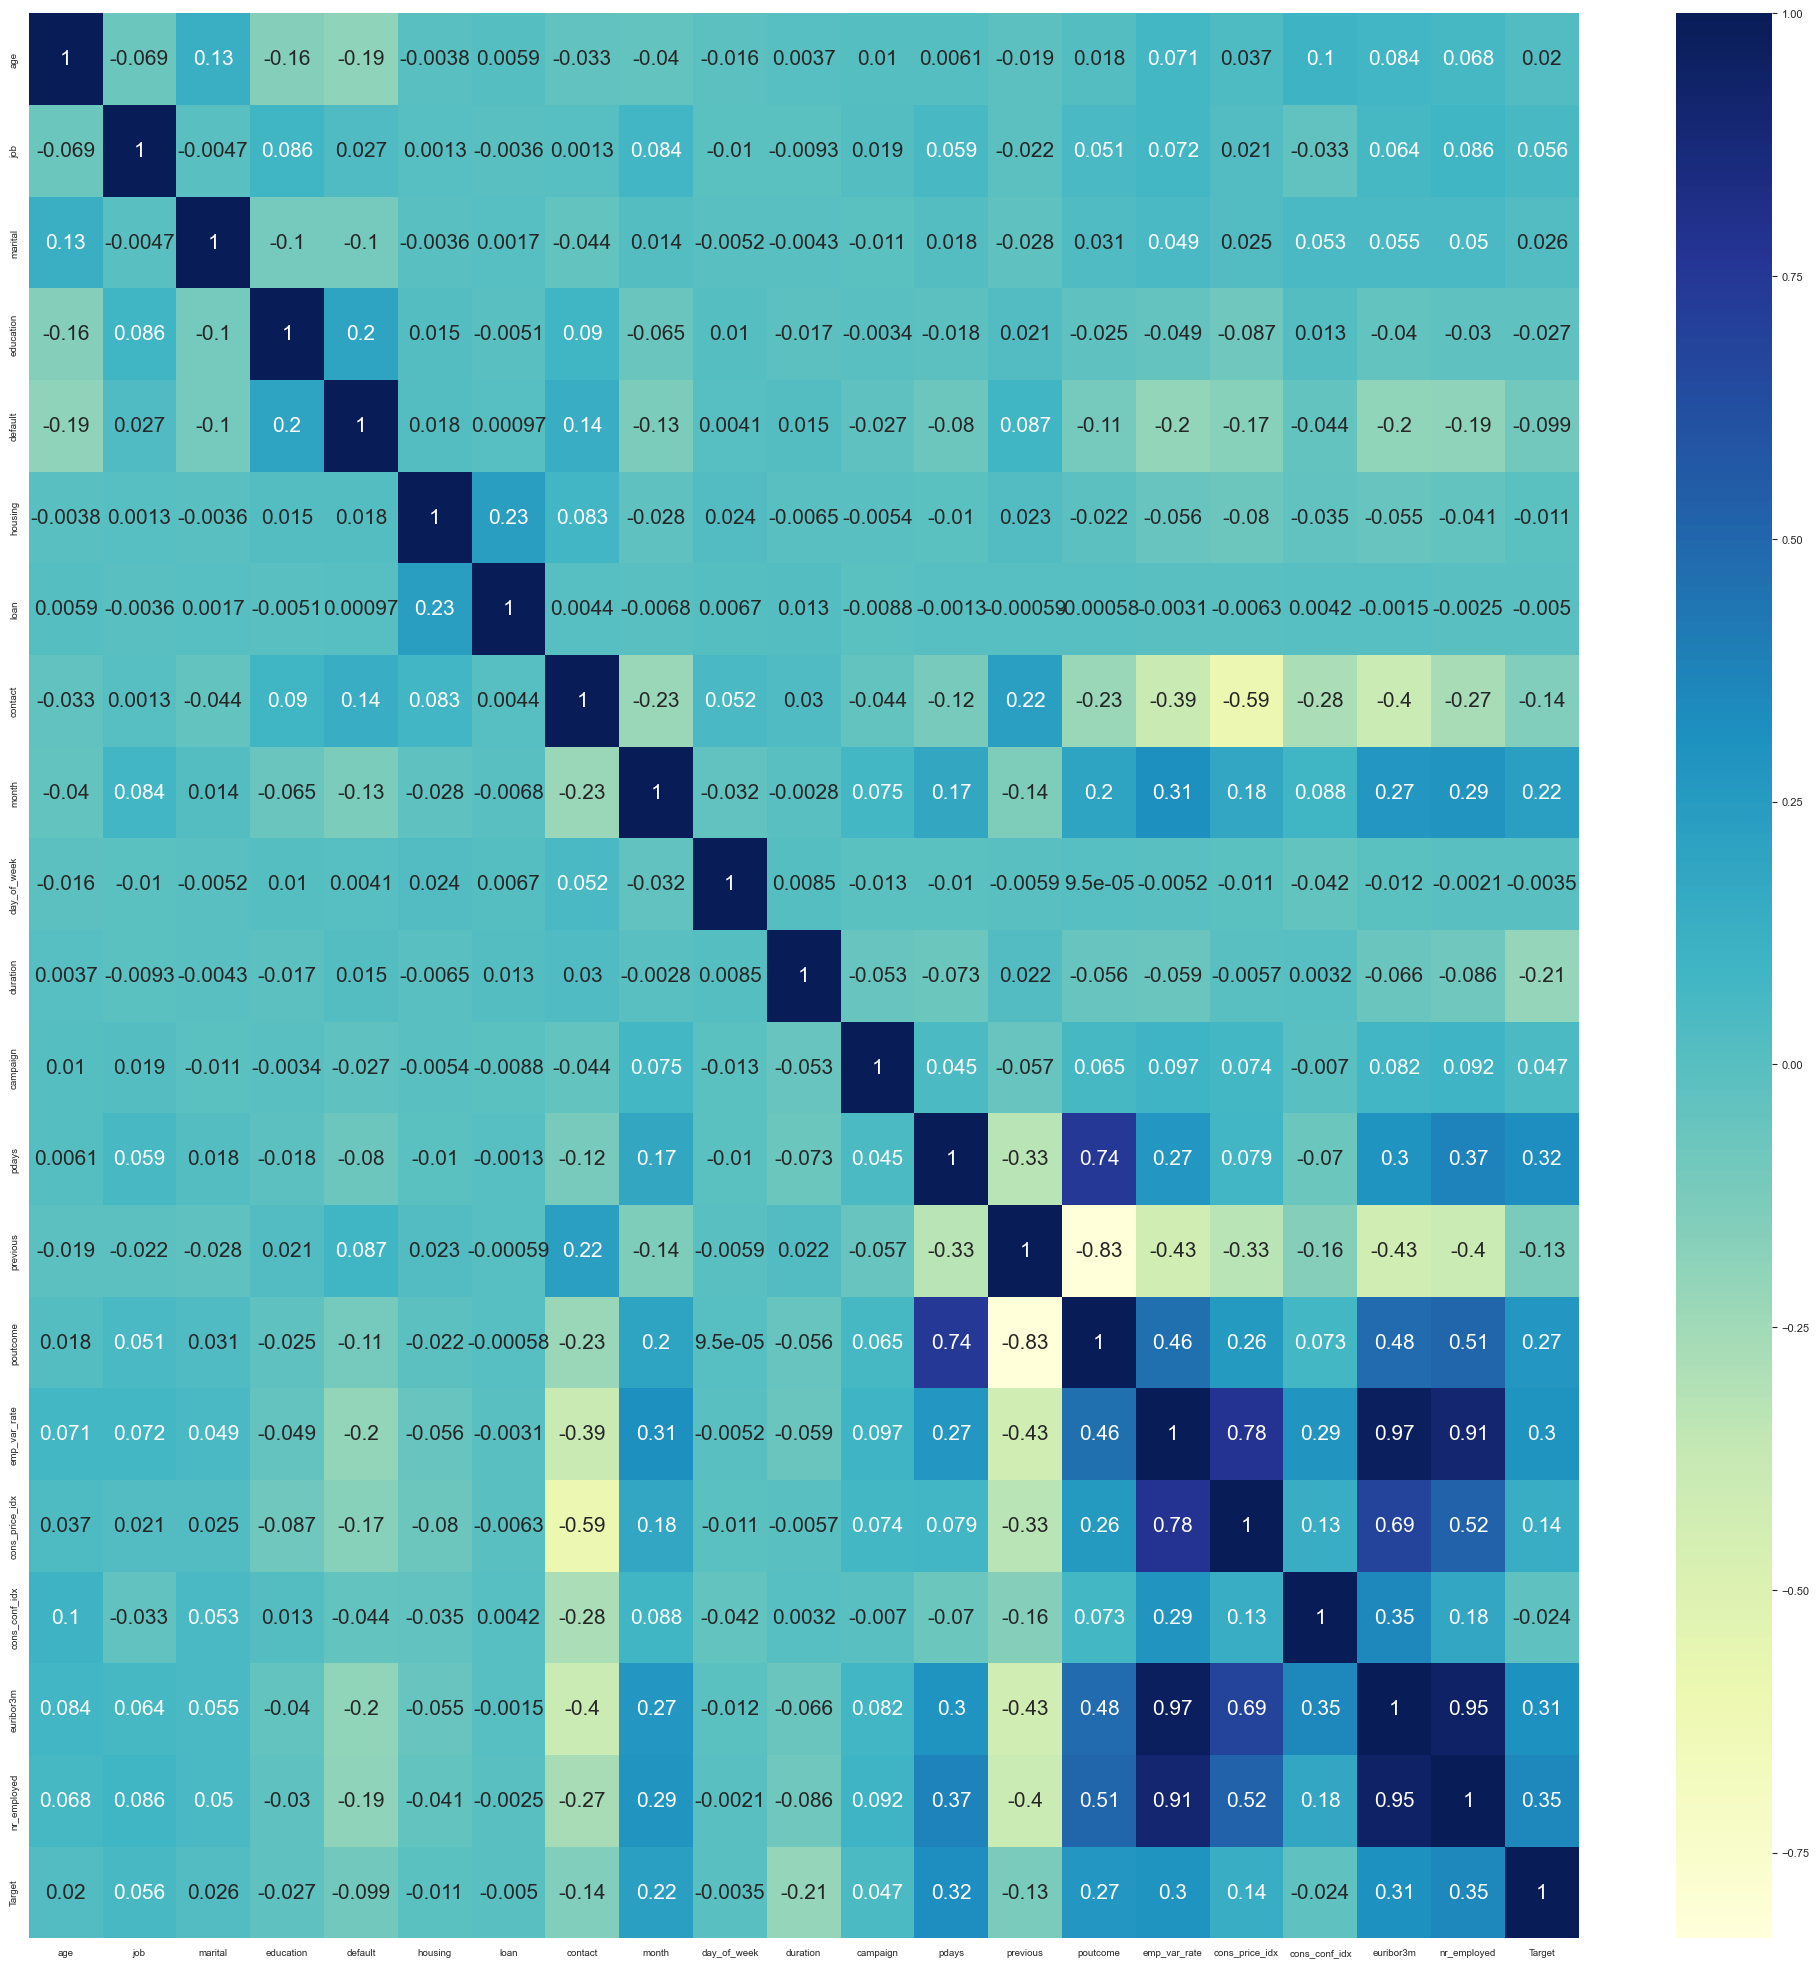

In [88]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu",annot_kws={"size":15})
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

- higly correlated features (emp_var_rate, euribor3m, nr_employed).

In [89]:
# To get highly corelated feature
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1      feature2      corr
0  emp_var_rate     euribor3m  0.972245
1     euribor3m  emp_var_rate  0.972245
2   nr_employed     euribor3m  0.945154
3     euribor3m   nr_employed  0.945154
4  emp_var_rate   nr_employed  0.906970
5   nr_employed  emp_var_rate  0.906970

In [90]:
data.drop(["emp_var_rate","euribor3m"],axis=1,inplace=True)

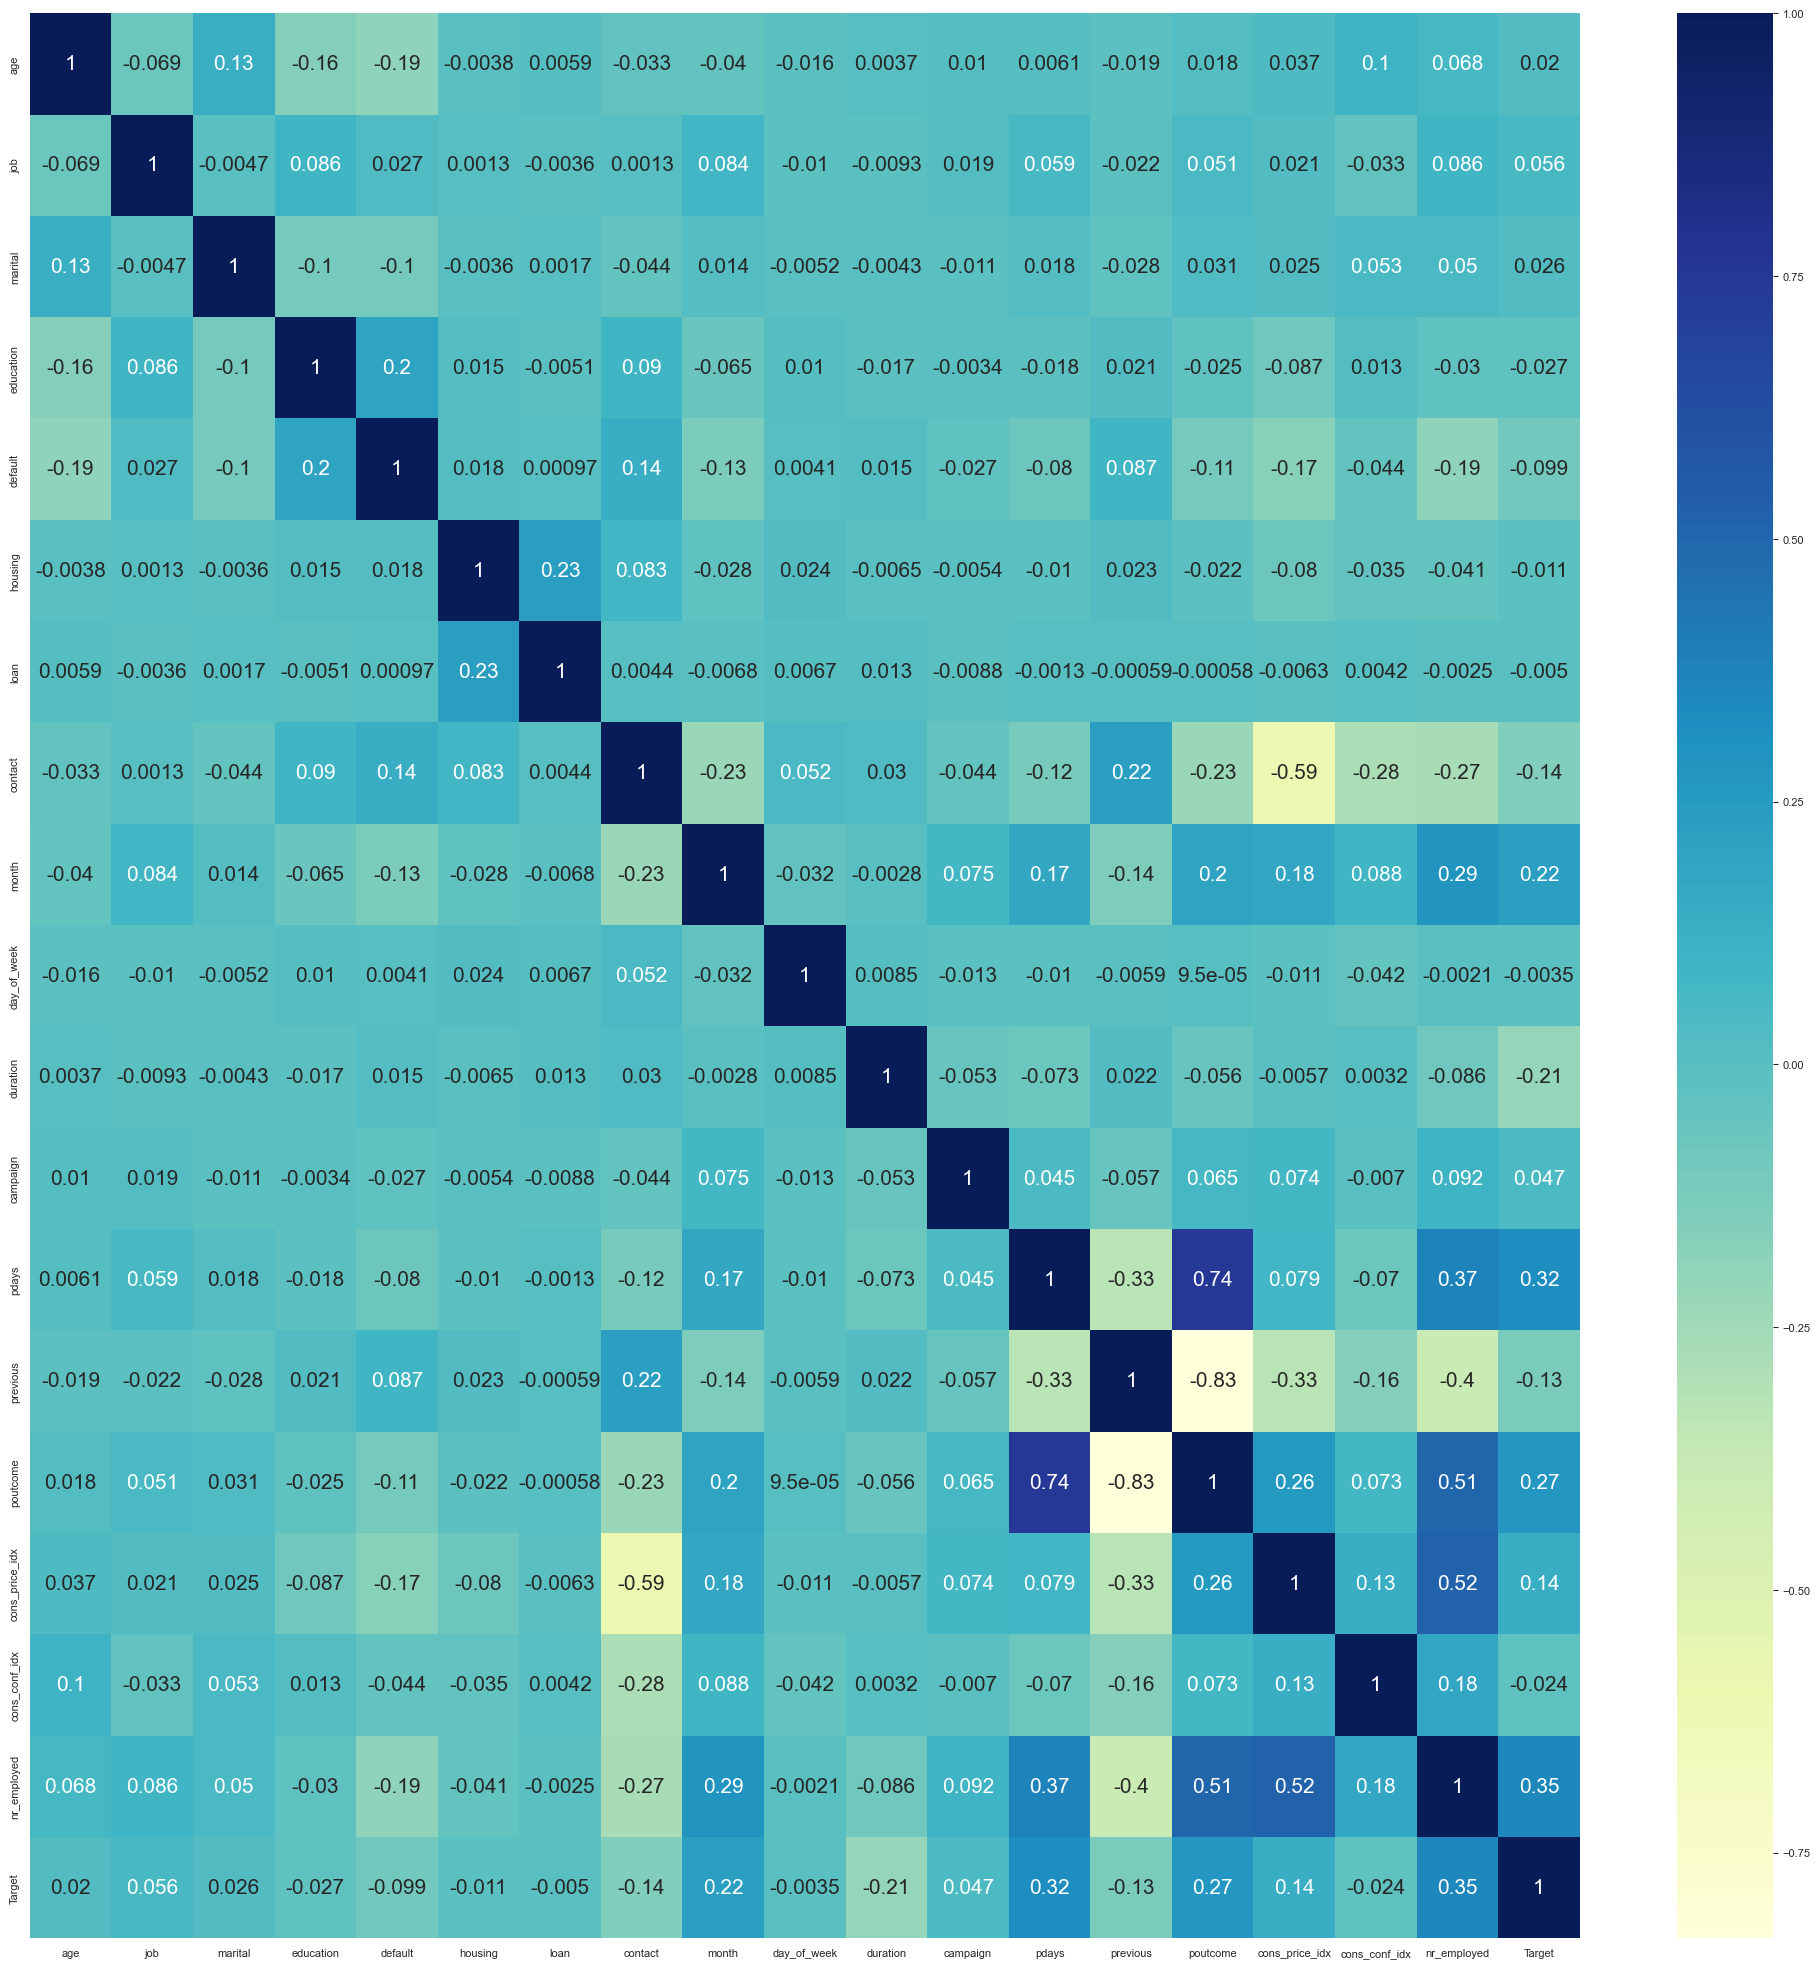

In [91]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu",annot_kws={"size":15})
plt.show()

### 2. CHECK DUPLICATES VALUES

In [92]:
data.duplicated().sum()

29

In [93]:
data.drop_duplicates(inplace=True)

In [94]:
data.duplicated().sum()

0

### 3.SAVE & LOAD THE PREPROCESS DATA

In [95]:
# Save the dataframe to a CSV file
data.to_csv('Portugese_BankPreprocessData.csv', index=False)

## MODEL CREATION & EVALUATION


### Models: 
1. Logistic Regression
2. Decision Tree classification
3. Random Forest
3. XGB classification
4. KNN classification
5. Artificial Nueral Network Classifier

### 1. DEFINE INDEPENDANT AND DEPENDANT FEATURES

In [96]:
X=data.drop("Target",axis=1)
y=data.Target

### 2. SPLITE TRANING AND TESTING DATA

In [97]:
# Creating traning and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=3)

In [98]:
X_train.shape

(28811, 18)

In [99]:
X_test.shape

(12348, 18)

### 3. CHECK BALANCING DATA

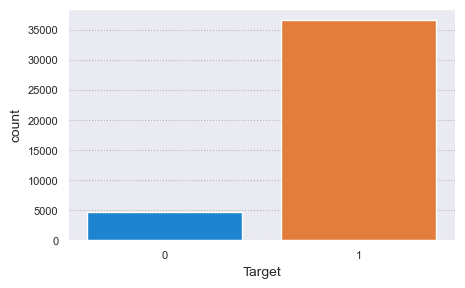

In [100]:
plt.figure(figsize=(5,3),facecolor="white")
sns.countplot(x=data["Target"])
plt.show()

In [101]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X_train,y_train)
print("Actual class",Counter(y_train))
print("Smote class",Counter(y_smote))

Actual class Counter({1: 25559, 0: 3252})
Smote class Counter({1: 25559, 0: 25559})


### MODEL BUILDING

### 1. LOGISTIC REGRESSION

In [102]:
# Import logistic regression model
from sklearn.linear_model import LogisticRegression

# Initialise model/Object
log_model=LogisticRegression()

# Train model with x_train and y_train
log_model.fit(X_train,y_train)

# Make prediction / test model
logy_test_pred=log_model.predict(X_test)

# Testing model on train data
logy_train_pred=log_model.predict(X_train)

#### EVALUATION OF LOGISTIC_REGRESSION

**TRAINING ACCURACY**

In [103]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,classification_report,confusion_matrix
# Evaluate the model using different metrics
log_train_accuracy = accuracy_score(y_train,logy_train_pred)
log_train_f1 = f1_score(y_train,logy_train_pred)
print("log_train_Accuracy: {:.2f}".format(log_train_accuracy))
print("log_train_F1 Score: {:.2f}".format(log_train_f1))

log_train_Accuracy: 0.90
log_train_F1 Score: 0.95


**TESTINING ACCURACY**

In [104]:
# Evaluate the model using different metrics
log_test_accuracy = accuracy_score(y_test,logy_test_pred)
log_test_precision = precision_score(y_test,logy_test_pred)
log_test_recall = recall_score(y_test,logy_test_pred)
log_test_f1 = f1_score(y_test,logy_test_pred)

# Print the metrics
print("log_test_Accuracy: {:.2f}".format(log_test_accuracy))
print("log_test_Precision: {:.2f}".format(log_test_precision))
print("log_test_Recall: {:.2f}".format(log_test_recall))
print("log_test_F1 Score: {:.2f}".format(log_test_f1))

log_test_Accuracy: 0.90
log_test_Precision: 0.91
log_test_Recall: 0.98
log_test_F1 Score: 0.95


### ROC-AUC METHOD 

In [105]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,logy_test_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.6283908920813117


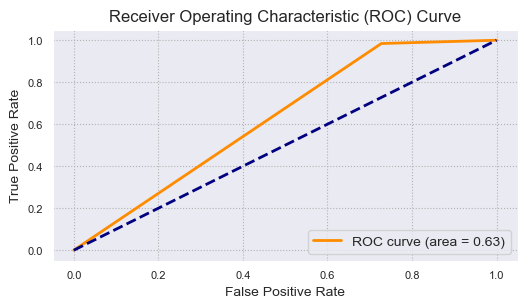

In [106]:
plt.figure(figsize=(6,3))
plt.plot(false_positive_rate,true_positive_rate,color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 2. DECISION TREE CLASSIFIER

In [107]:
from sklearn.tree import DecisionTreeClassifier

# Initialised model
DT_model=DecisionTreeClassifier()

# Training model training data
DT_model.fit(X_smote,y_smote)

# Testing model on test data
DTy_test_pred=DT_model.predict(X_test)

# Testing model on train data
DTy_train_pred=DT_model.predict(X_train)

#### EVALUATION OF DECISION_TREE MODEL

**TRAINING ACCURACY**

In [108]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,classification_report,confusion_matrix
# Evaluate the model using different metrics
DT_train_accuracy = accuracy_score(y_train,DTy_train_pred)
DT_train_f1 = f1_score(y_train,DTy_train_pred)

# Print the metrics
print("DT_train_Accuracy: {:.2f}".format(DT_train_accuracy))
print("DT_train_F1 Score: {:.2f}".format(DT_train_f1))

DT_train_Accuracy: 1.00
DT_train_F1 Score: 1.00


**TESTINING ACCURACY**

In [109]:
# Evaluate the model using different metrics
DT_test_accuracy = accuracy_score(y_test,DTy_test_pred)
DT_test_precision = precision_score(y_test,DTy_test_pred)
DT_test_recall = recall_score(y_test,DTy_test_pred)
DT_test_f1 = f1_score(y_test,DTy_test_pred)

# Print the metrics
print("DT_test_Accuracy: {:.2f}".format(DT_test_accuracy))
print("DT_test_Precision: {:.2f}".format(DT_test_precision))
print("DT_test_Recall: {:.2f}".format(DT_test_recall))
print("DT_test_F1 Score: {:.2f}".format(DT_test_f1))

DT_test_Accuracy: 0.86
DT_test_Precision: 0.95
DT_test_Recall: 0.89
DT_test_F1 Score: 0.92


### 3. RANDOM FOREST CLASSIFIER

In [110]:
from sklearn.ensemble import RandomForestClassifier

# Initialised model
RFC_model=RandomForestClassifier()

# Train model with training data
RFC_model.fit(X_smote,y_smote)

# Testing on test data
RFCy_test_pred=RFC_model.predict(X_test)

# Testing on train data
RFCy_train_pred=RFC_model.predict(X_train)

#### EVALUATION OF RANDOM_FOREST MODEL

**TRAINING ACCURACY**

In [111]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,classification_report,confusion_matrix
# Evaluate the model using different metrics
RFC_train_accuracy = accuracy_score(y_train,RFCy_train_pred)
RFC_train_f1 = f1_score(y_train,RFCy_train_pred)
print("RFC_train_Accuracy: {:.2f}".format(RFC_train_accuracy))
print("RFC_train_F1 Score: {:.2f}".format(RFC_train_f1))

RFC_train_Accuracy: 1.00
RFC_train_F1 Score: 1.00


**TESING ACCURACY**

In [112]:
# Evaluate the model using different metrics
RFC_test_accuracy = accuracy_score(y_test,RFCy_test_pred)
RFC_test_precision = precision_score(y_test,RFCy_test_pred)
RFC_test_recall = recall_score(y_test,RFCy_test_pred)
RFC_test_f1 = f1_score(y_test,RFCy_test_pred)

# Print the metrics
print("RFC_test_Accuracy: {:.2f}".format(RFC_test_accuracy))
print("RFC_test_Precision: {:.2f}".format(RFC_test_precision))
print("RFC_test_Recall: {:.2f}".format(RFC_test_recall))
print("RFC_test_F1 Score: {:.2f}".format(RFC_test_f1))

RFC_test_Accuracy: 0.89
RFC_test_Precision: 0.96
RFC_test_Recall: 0.91
RFC_test_F1 Score: 0.94


### 4. XG BOOSTING CLASSIFIER

In [113]:
from xgboost import XGBClassifier

# Initialised model
XGB_model=XGBClassifier()

# train model with training data
XGB_model.fit(X_smote,y_smote)

# test model with testing data
XGBy_test_pred=XGB_model.predict(X_test)

# Make prediction on train data
XGBy_train_pred=XGB_model.predict(X_train)

#### EVALUATION OF XGB MODEL

**TRAINING ACCURACY**

In [114]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,classification_report,confusion_matrix
# Evaluate the model using different metrics
XGB_train_accuracy = accuracy_score(y_train,XGBy_train_pred)
XGB_train_f1 = f1_score(y_train,XGBy_train_pred)
print("XGB_train_Accuracy: {:.2f}".format(XGB_train_accuracy))
print("XGB_train_F1 Score: {:.2f}".format(XGB_train_f1))

XGB_train_Accuracy: 0.95
XGB_train_F1 Score: 0.97


**TESING ACCURACY**

In [115]:
# Evaluate the model using different metrics
XGB_test_accuracy = accuracy_score(y_test,XGBy_test_pred)
XGB_test_precision = precision_score(y_test,XGBy_test_pred)
XGB_test_recall = recall_score(y_test,XGBy_test_pred)
XGB_test_f1 = f1_score(y_test,XGBy_test_pred)

# Print the metrics
print("XGB_test_Accuracy: {:.2f}".format(XGB_test_accuracy))
print("XGB_test_Precision: {:.2f}".format(XGB_test_precision))
print("XGB_test_Recall: {:.2f}".format(XGB_test_recall))
print("XGB_test_F1 Score: {:.2f}".format(XGB_test_f1))

XGB_test_Accuracy: 0.90
XGB_test_Precision: 0.95
XGB_test_Recall: 0.94
XGB_test_F1 Score: 0.94


### 5. KNN CLASSIFIER

In [116]:
from sklearn.neighbors import KNeighborsClassifier

# Initialised model
KNN_model=KNeighborsClassifier(n_neighbors=2)

# train Model
KNN_model.fit(X_smote,y_smote)

# test model
KNNy_test_pred=KNN_model.predict(X_test)

# Make prediction on train data
KNNy_train_pred=KNN_model.predict(X_train)

#### EVALUATION OF KNN MODEL

In [117]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
test_acc=accuracy_score(y_test,KNNy_test_pred)
print("Accuracy_score",test_acc)
test_f1_score=f1_score(y_test,KNNy_test_pred)
print("F1_score",test_f1_score)

Accuracy_score 0.7393909944930354
F1_score 0.8367326230339929


In [118]:
error_rate = [] 
for k in range(2,11):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train,y_train)
    y_pred = KNN_model.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))
print("Error rate:",error_rate)

Error rate: [0.18845157110463234, 0.11386459345643019, 0.1245545837382572, 0.10487528344671201, 0.11070618723679948, 0.10398445092322643, 0.10681891804340785, 0.10285066407515388, 0.10333657272432782]


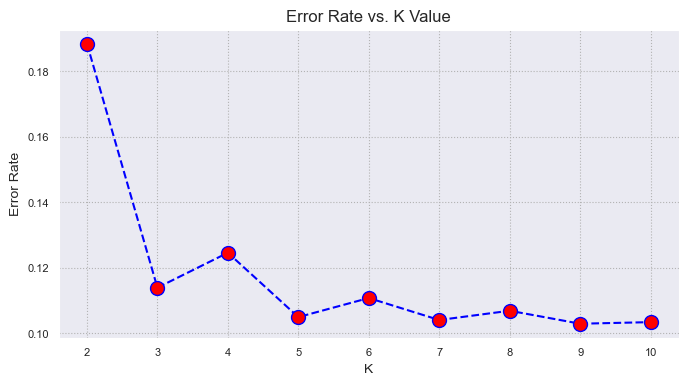

In [119]:
plt.figure(figsize=(8,4))
plt.plot(range(2,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [120]:
from sklearn.neighbors import KNeighborsClassifier

# Initialised model
KNN_model2=KNeighborsClassifier(n_neighbors=9)

# train Model
KNN_model2.fit(X_smote,y_smote)

# test model
KNy2_test_pred=KNN_model2.predict(X_test)

# Make prediction on train data
KNy2_train_pred=KNN_model2.predict(X_train)

#### EVALUATION OF KNN MODEL

**TRAINING ACCURACY**

In [121]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,classification_report,confusion_matrix
# Evaluate the model using different metrics
KNN_train_accuracy = accuracy_score(y_train,KNy2_train_pred)
KNN_train_f1 = f1_score(y_train,KNy2_train_pred)
print("KNN_train_Accuracy: {:.2f}".format(KNN_train_accuracy))
print("KNN_train_F1 Score: {:.2f}".format(KNN_train_f1))

KNN_train_Accuracy: 0.83
KNN_train_F1 Score: 0.90


**TESING ACCURACY**

In [122]:
# Evaluate the model using different metrics
KNN_test_accuracy = accuracy_score(y_test,KNy2_test_pred)
KNN_test_precision = precision_score(y_test,KNy2_test_pred)
KNN_test_recall = recall_score(y_test,KNy2_test_pred)
KNN_test_f1 = f1_score(y_test,KNy2_test_pred)

# Print the metrics
print("KNN_test_Accuracy: {:.2f}".format(KNN_test_accuracy))
print("KNN_test_Precision: {:.2f}".format(KNN_test_precision))
print("KNN_test_Recall: {:.2f}".format(KNN_test_recall))
print("KNN_test_F1 Score: {:.2f}".format(KNN_test_f1))

KNN_test_Accuracy: 0.77
KNN_test_Precision: 0.95
KNN_test_Recall: 0.78
KNN_test_F1 Score: 0.86


In [123]:
np.seterr(all='warn')

{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

### ARTIFICIAL NEURAL NETWORK MODEL

In [130]:
from sklearn.neural_network import MLPClassifier
MLP_model=MLPClassifier(hidden_layer_sizes=(50,8),
                   learning_rate_init=0.1,
                   max_iter=100,
                   random_state=2)
# train model
MLP_model.fit(X_smote,y_smote)

# Make prediction on test data
MLPy_test_pred=MLP_model.predict(X_test)

# Make prediction on train data
MLPy_train_pred=MLP_model.predict(X_train)

#### EVALUATION OF MLP MODEL

**TRAINING ACCURACY**

In [125]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,classification_report,confusion_matrix
# Evaluate the model using different metrics
MLP_train_accuracy = accuracy_score(y_train,MLPy_train_pred)
MLP_train_f1 = f1_score(y_train,MLPy_train_pred)
print("MLP_train_Accuracy: {:.2f}".format(MLP_train_accuracy))
print("MLP_train_F1 Score: {:.2f}".format(MLP_train_f1))

MLP_train_Accuracy: 0.81
MLP_train_F1 Score: 0.88


**TESING ACCURACY**

In [126]:
# Evaluate the model using different metrics
MLP_test_accuracy = accuracy_score(y_test,MLPy_test_pred)
MLP_test_precision = precision_score(y_test,MLPy_test_pred)
MLP_test_recall = recall_score(y_test,MLPy_test_pred)
MLP_test_f1 = f1_score(y_test,MLPy_test_pred)

# Print the metrics
print("MLP_test_Accuracy: {:.2f}".format(MLP_test_accuracy))
print("MLP_test_Precision: {:.2f}".format(MLP_test_precision))
print("MLP_test_Recall: {:.2f}".format(MLP_test_recall))
print("MLP_test_F1 Score: {:.2f}".format(MLP_test_f1))

MLP_test_Accuracy: 0.81
MLP_test_Precision: 0.97
MLP_test_Recall: 0.81
MLP_test_F1 Score: 0.88


#### ALL MODEL SCORES

In [127]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XG Boosting', 'KNN classifier', 'Artificial Neural Network']
accuracy_scores = [0.90, 0.86, 0.89, 0.90, 0.76, 0.89]
precision_scores = [0.91, 0.95, 0.96, 0.95, 0.95, 0.89]
recall_scores = [0.98, 0.89, 0.91, 0.94, 0.78, 1.00]
f1_scores = [0.95, 0.92, 0.94, 0.94, 0.85, 0.94]

# Create a dictionary with the metrics
data = {
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(data)

# Print the DataFrame
print(metrics_df)

                       Model  Accuracy  Precision  Recall  F1 Score
0        Logistic Regression      0.90       0.91    0.98      0.95
1              Decision Tree      0.86       0.95    0.89      0.92
2              Random Forest      0.89       0.96    0.91      0.94
3                XG Boosting      0.90       0.95    0.94      0.94
4             KNN classifier      0.76       0.95    0.78      0.85
5  Artificial Neural Network      0.89       0.89    1.00      0.94


**Best model**

Our best performed model with accuracy (0.90) metric is XG Boost and Logistic. This classifier could achive accuracy rate 0.90 that is average accuracy.

### MODEL SAVE

In [128]:
import pickle
XGB_FILE =open("XGB_CLASSIFIER.pkl","wb")
pickle.dump(XGB_model,XGB_FILE)

In [129]:
import pickle
RFC_FILE =open("LOGISTIC_REGRESSION.pkl","wb")
pickle.dump(log_model,XGB_FILE)

### CONCLUSION :

- This analysis can be carried out at the level of individual bank branches as does not require much resources and special knowledge (the model itself can be launched automatically with a certain periodicity).
1. Take into account the time of the company (May is the most effective)
2. The model shows that students and senior citizens respond better to proposal.
3. profession accurately determine the marketing profile of a potential client.
4. the bank’s contact time with the client - it affects most of all on conversion.
- Given these factors, it is recommended to concentrate on those consumer groups that are potentially more promising.
- Many banks use direct marketing strategies to enable customers to access adequate information about the products. Researchers suggest that the applicability of data mining techniques depends on the availability of customers’ information. Also, studies reveal that machine learning techniques determine customer response to bank products.
- The ability of the customers to subscribe to term deposits depends on the marketing campaign by the bank.In this research work three machine learning algorithms (Logistic regression,Decision Tree, Random Forest, XGB Classifier, KNN, ANN) were deployed to find out the main factor that influences customers decision to subscribe to a term deposit in the bank. Correlation heatmap was then used to get the most important factors that influence customer decisions and was then retrained to perform the 

#### --------------------------------------------------------------------------- Thank You ---------------------------------------------------------------------------